<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [23]:
# YOUR CODE HERE
import pandas as pd 
import seaborn as sns 
past = pd.read_csv('../dat/past.csv.gz')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [2]:
# YOUR CODE HERE
past['Purchased?'].mean() * 100 

34.38

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [3]:
# YOUR CODE HERE
# YOUR CODE HERE

X = past.drop(['product_id','user_id'],axis=1)
y = X.pop('Purchased?')

In [4]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [5]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
pca = PCA(n_components=5,whiten=True)

X_scaled = scaler.fit_transform(X)
X_reduced = pca.fit_transform(X_scaled)

In [6]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [7]:
# YOUR CODE HERE
pca.explained_variance_ratio_

array([0.10282144, 0.09445923, 0.06514524, 0.050419  , 0.04312317])

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [8]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [9]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

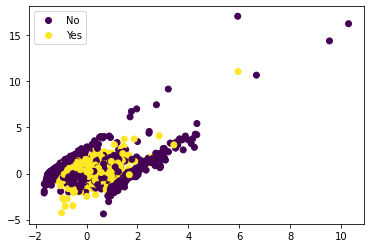

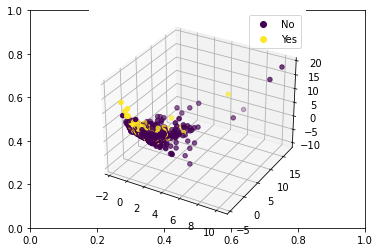

In [10]:
# YOUR CODE HERE
visualize_2pcs(X_reduced,y)
visualize_3pcs(X_reduced,y)

# YOUR CODE HERE

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [11]:
# YOUR CODE HERE (imports!)
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def train(X, y, standardize = True) -> None:
    X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0,test_size=.2)
    
    if standardize: 
        numeric_transformer = Pipeline(steps=[
            ('scaler',StandardScaler())
        ])
        
        pipeline=Pipeline(steps=[
            ('numeric',numeric_transformer),
            ('logistic_regression',LogisticRegression(class_weight='balanced',random_state=0))
        ])
    else:
         pipeline=Pipeline(steps=[
            ('logistic_regression',LogisticRegression(class_weight='balanced',random_state=0))
        ])
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test,y_pred))
        
    # YOUR CODE HERE

Now apply the pipeline on the all the features `X` and review the performance

In [12]:
train(X, y, standardize = True)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [13]:
# YOUR CODE HERE
train(X_reduced, y, standardize = False)

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       649
           1       0.50      0.53      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.66      0.65      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [14]:
# YOUR CODE HERE
from sklearn.cluster import KMeans 

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [15]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        kmeans = KMeans(n_clusters=k,random_state=10).fit(X)
        inertias.append(kmeans.inertia_)
        # YOUR CODE HERE
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

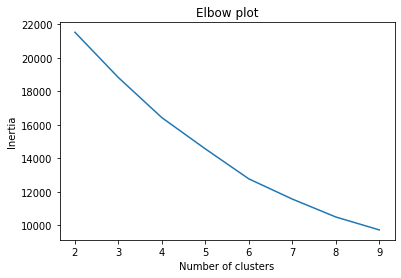

In [16]:
visualize_elbow(X_reduced,ks=list(range(2,10)))

4. What are the disadvantage to use the Elbow method? 

**YOUR ANSWER HERE** The disadvantage is that it takes a lot of time to find inertia since we are running KMeans ks times. It is also only telling us an aggregate statistic, we don't know how indiviudal clusters are performing.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [17]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.19682080283046613
For n_clusters = 3 The average silhouette_score is : 0.20986492012190203
For n_clusters = 4 The average silhouette_score is : 0.21814796982225818
For n_clusters = 5 The average silhouette_score is : 0.20475744749590932
For n_clusters = 6 The average silhouette_score is : 0.20799242556927802
For n_clusters = 7 The average silhouette_score is : 0.2128473602603432
For n_clusters = 8 The average silhouette_score is : 0.21744837239948606


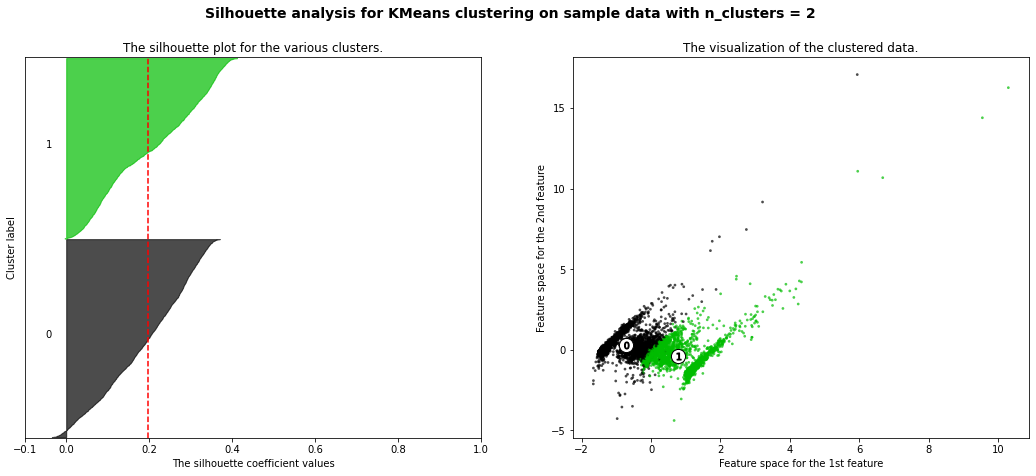

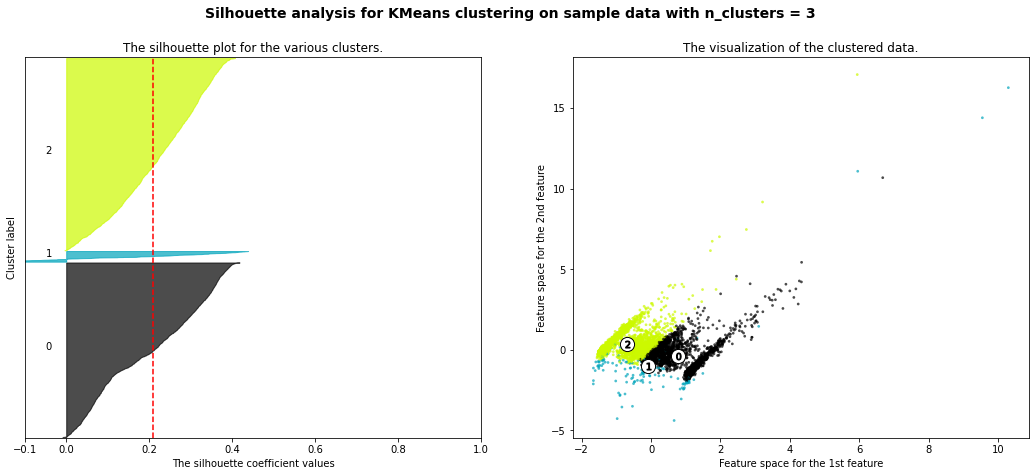

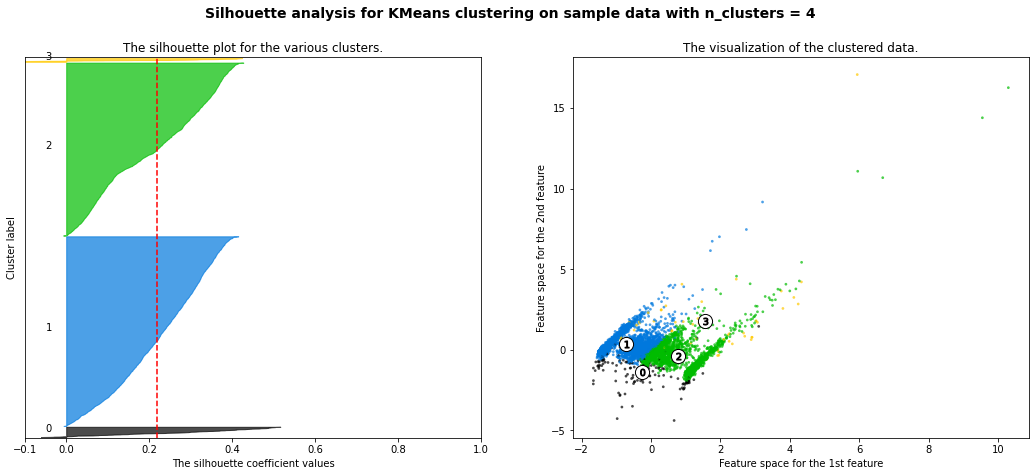

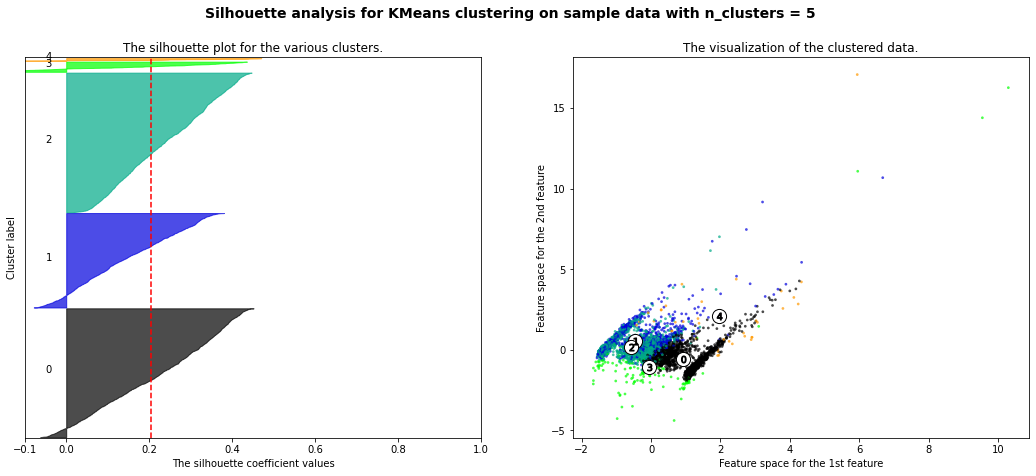

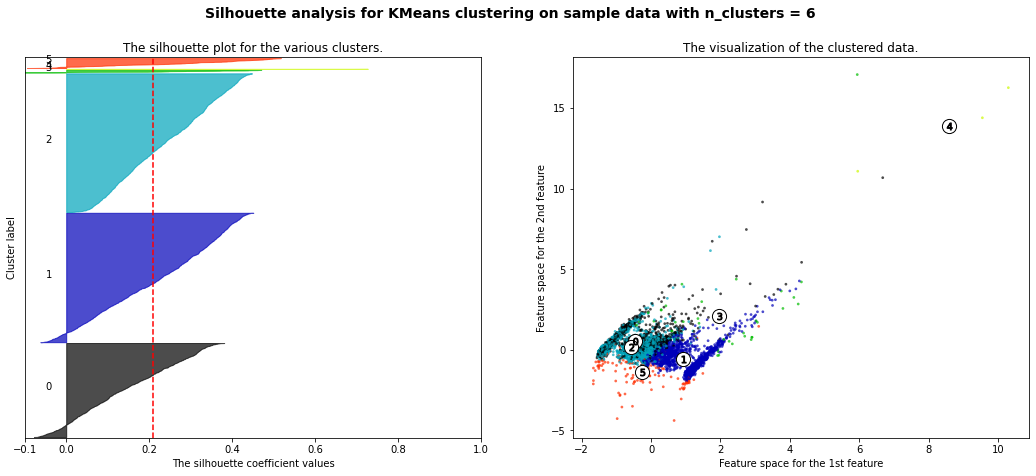

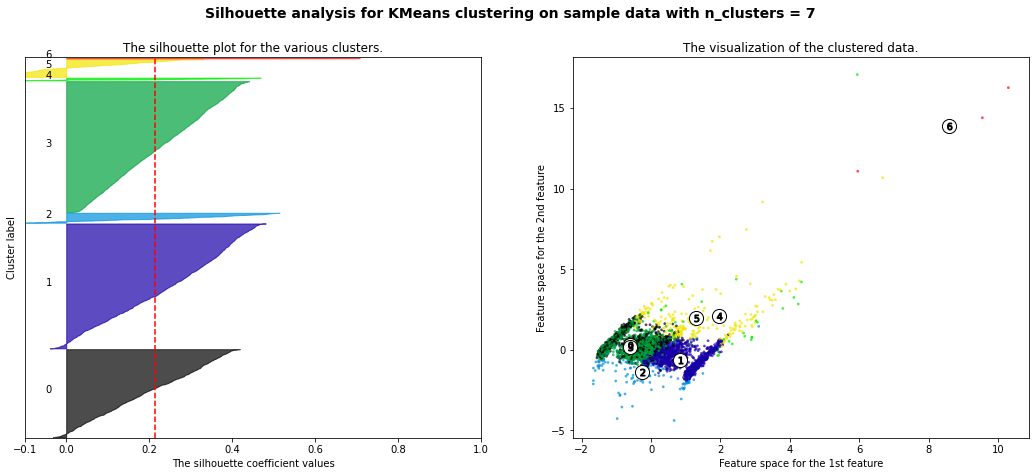

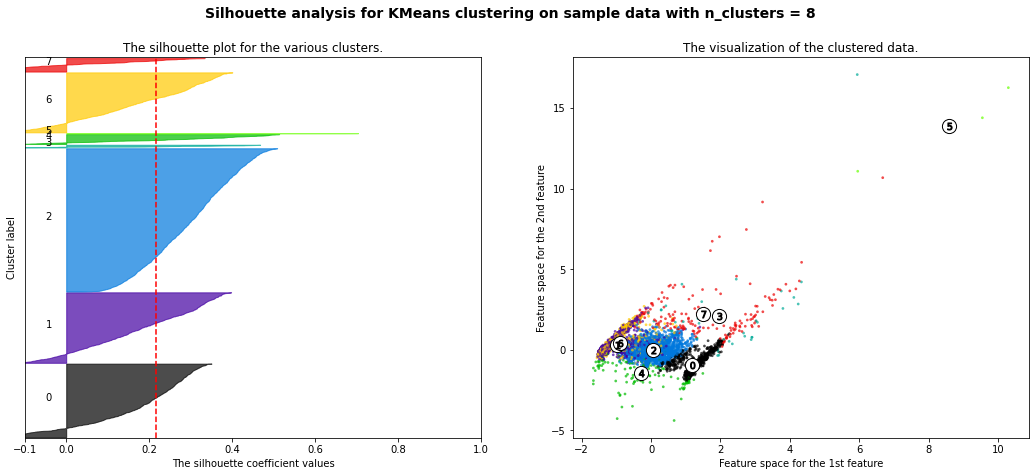

In [18]:
# YOUR CODE HERE
visualize_silhouette(max_clusters=8,X=X_reduced)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [26]:
# YOUR CODE HERE
km = KMeans(n_clusters=4,random_state=10)
km.fit(X_reduced)

KMeans(n_clusters=4, random_state=10)

7. What is the size of each cluster? 

In [27]:
# YOUR CODE HERE
pd.Series(km.labels_).value_counts().sort_index()

0     137
1    2518
2    2295
3      50
dtype: int64

8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [28]:
# YOUR CODE HERE
past['cluster_pca'] = km.labels_

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

*YOUR ANSWER HERE*

Initially, I wanted to see how the clusters were when it came to purchases in the app ; cluster 0 had the highest purchase rate of any group with 40% while cluster 3 had the lowest with 4% With that in mind, the median spent of cluster 0 is 49 dollars while the rest are less than 5 dollars. We can also see that ere are not as many items in Insession Carts for cluster 0 , where as cluster 3 has over 400 items in their cart ; this may imply cluster 0 has users that know what they want to purchase vs having users browse around and eventually not buy any product. This is also captured because cluster 0 has a lot less InsessionRemove than the other clusters, where they on average removed 729 dollars worth from their carts. We can also see that clusters 0 and 1 are majority data from 2019 where as clusters 2 and 3 are mostly 2020 data.


In [45]:
past.groupby('cluster_pca')['Purchased?'].value_counts(normalize=True) * 100 

cluster_pca  Purchased?
0            0             59.124088
             1             40.875912
1            0             64.297061
             1             35.702939
2            0             66.797386
             1             33.202614
3            0             96.000000
             1              4.000000
Name: Purchased?, dtype: float64

                                             |                                  | [  0%]   00:00 -> (? left)


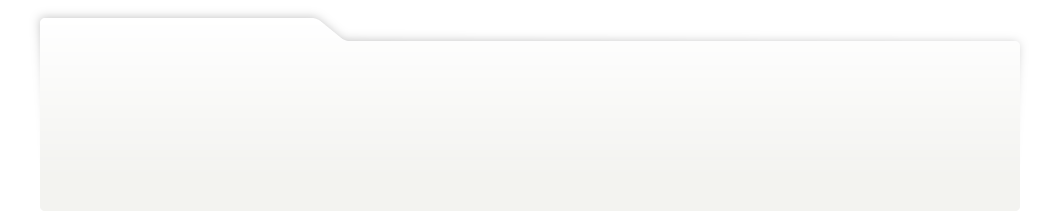
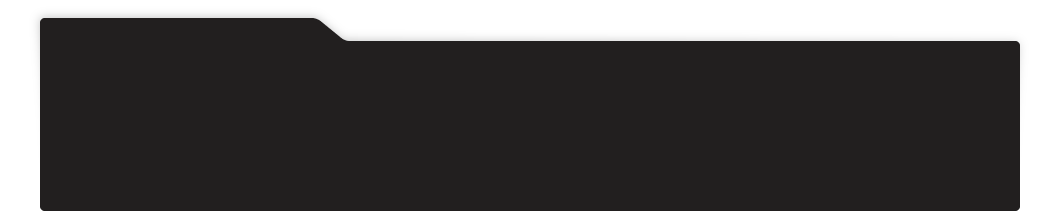
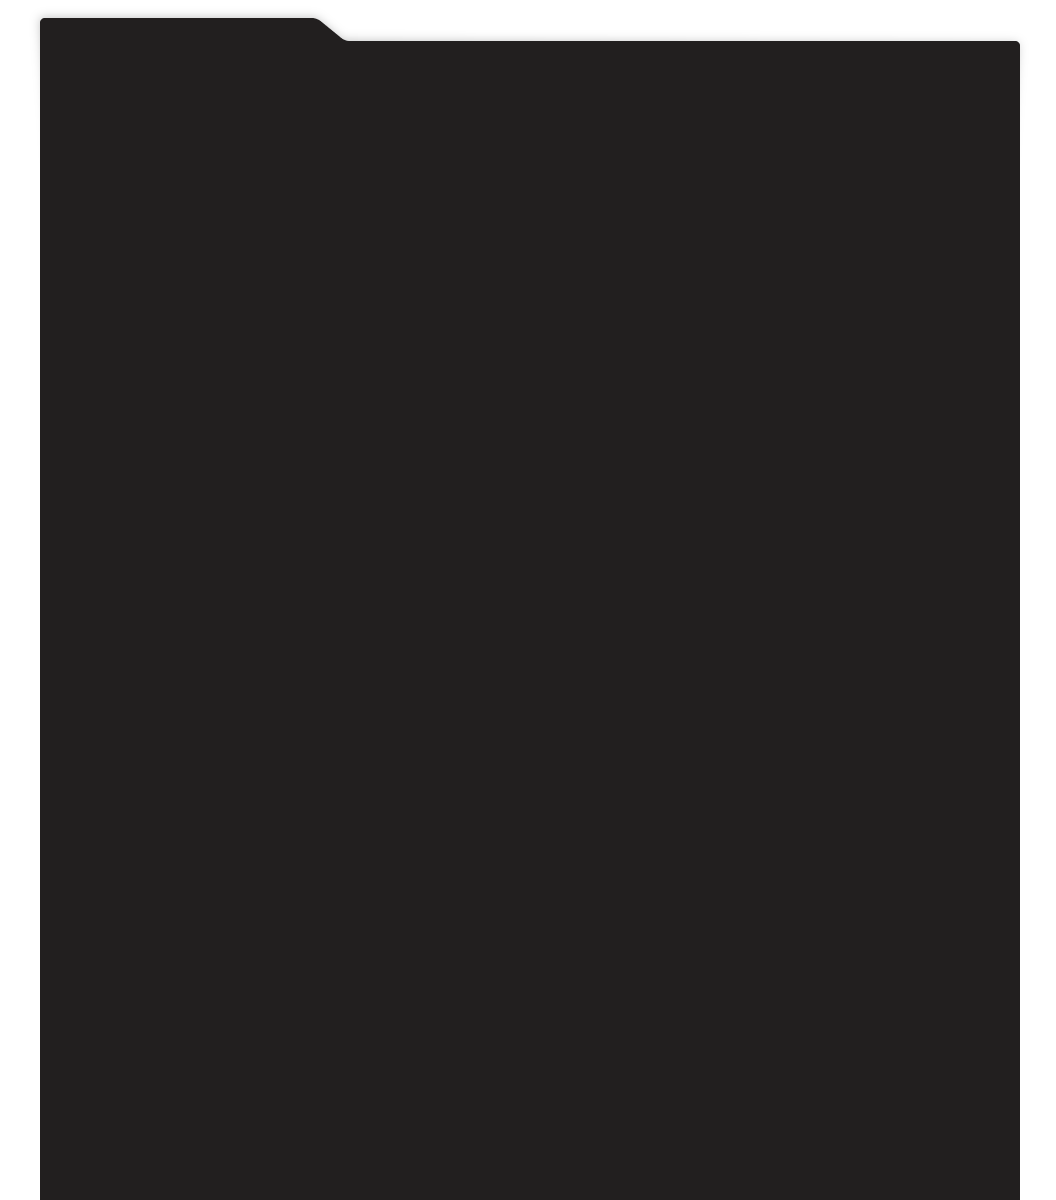
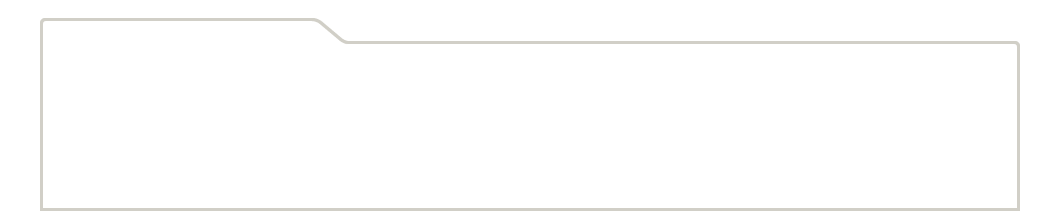
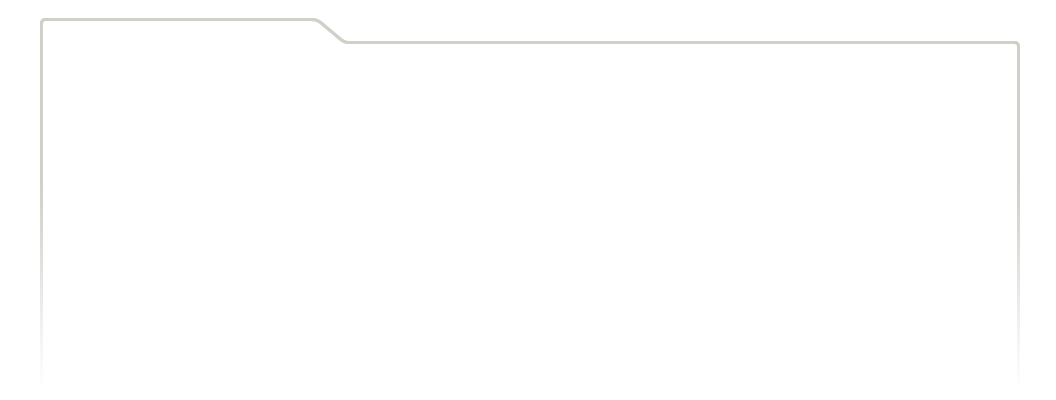
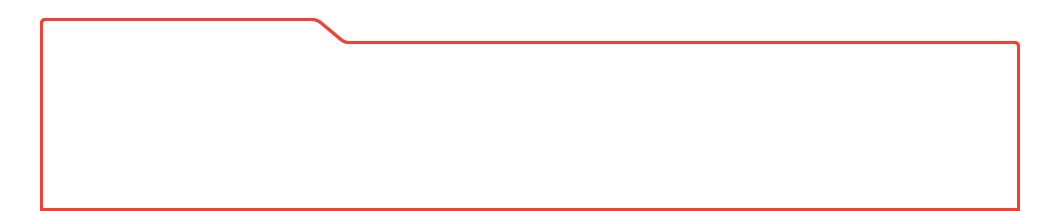
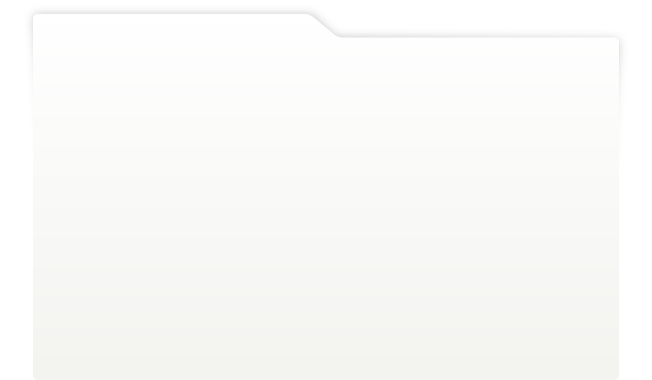
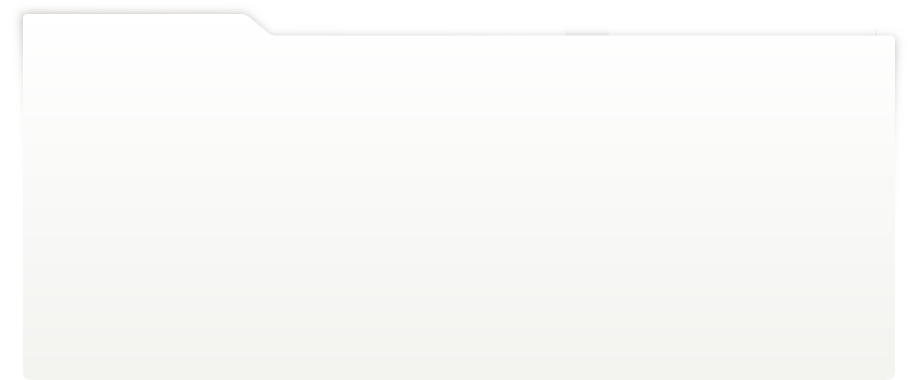
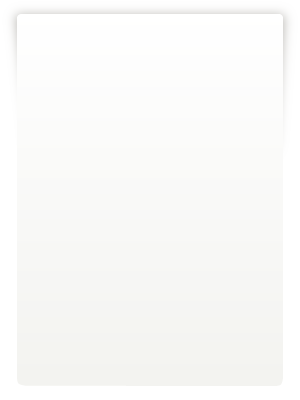
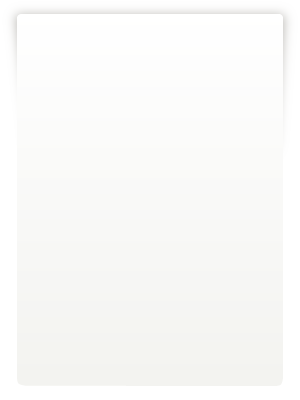
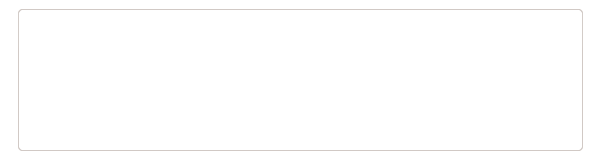
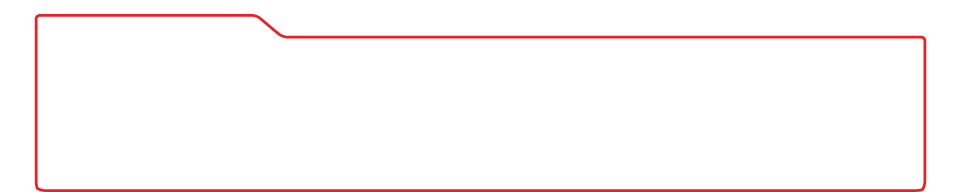
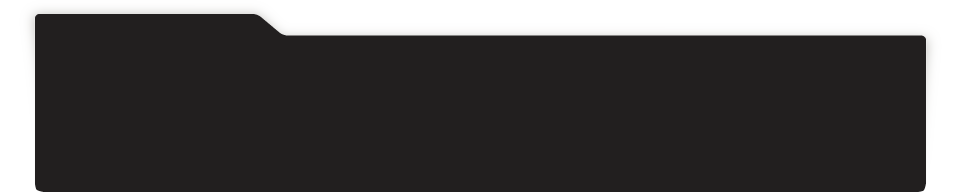
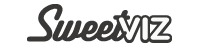
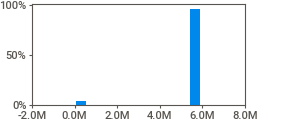
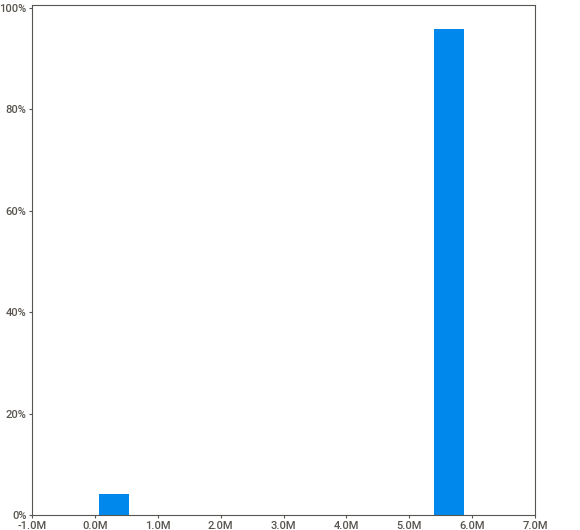
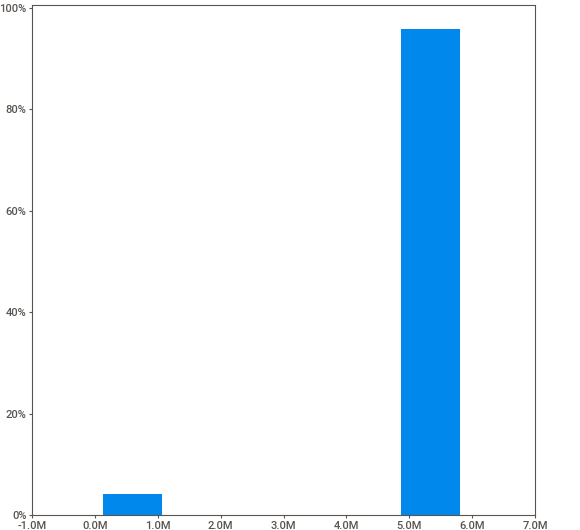
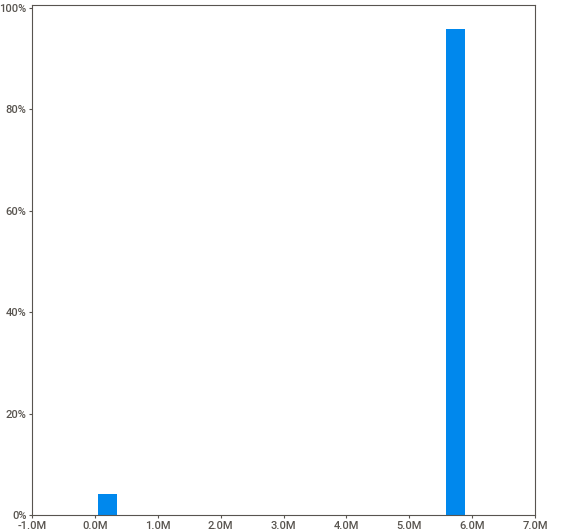
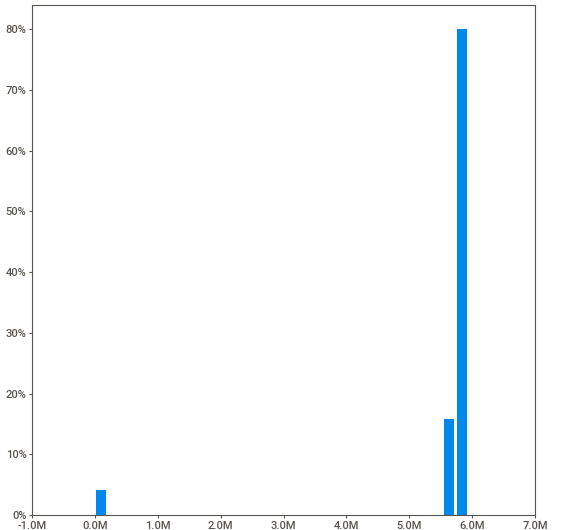
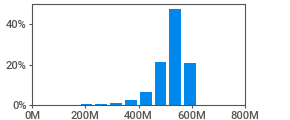
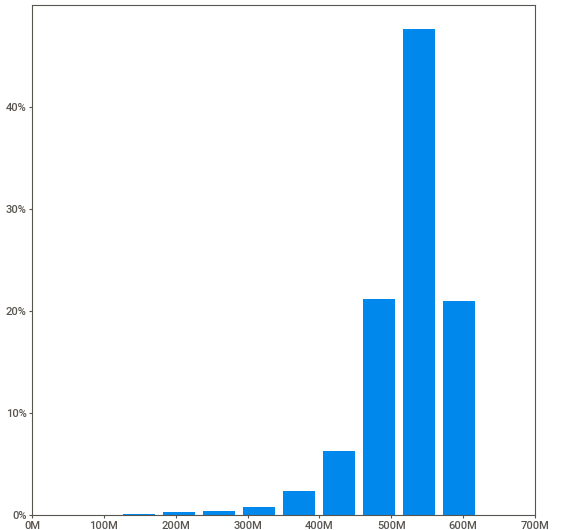
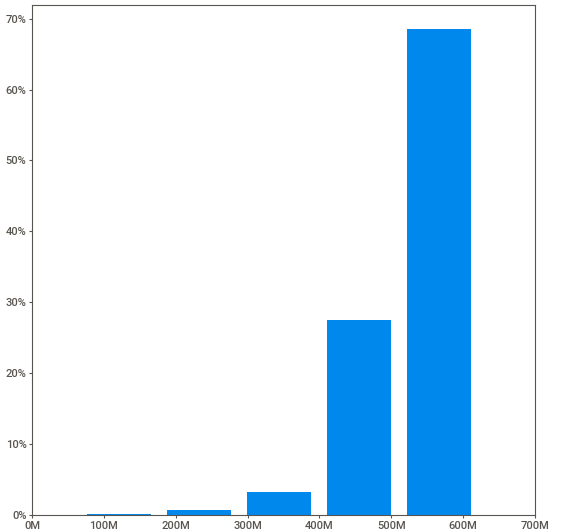
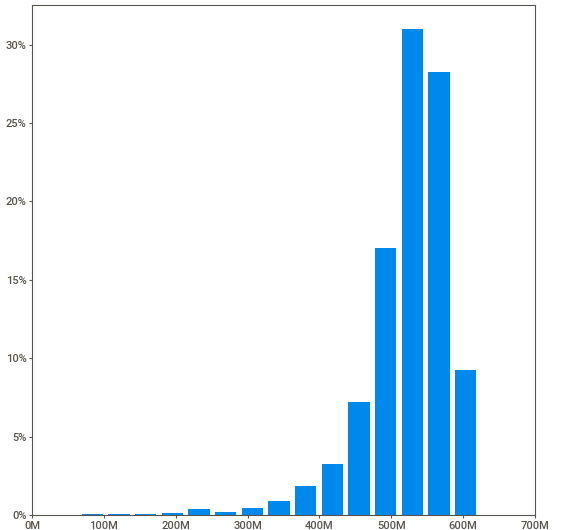
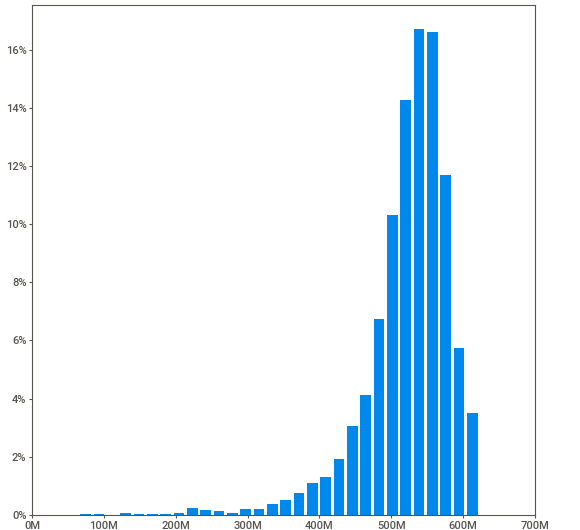
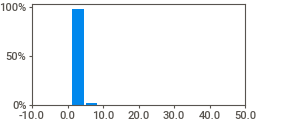
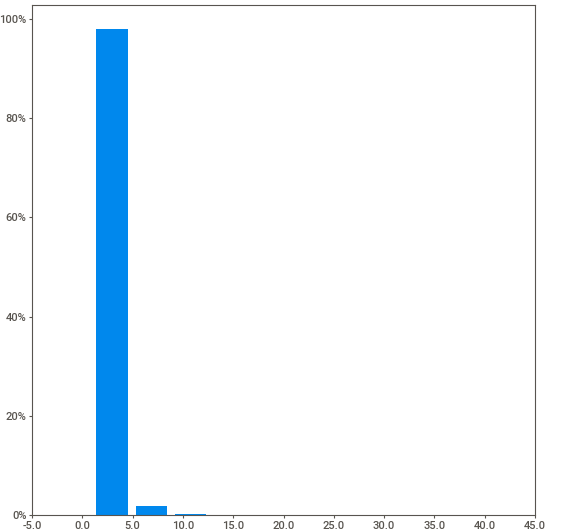
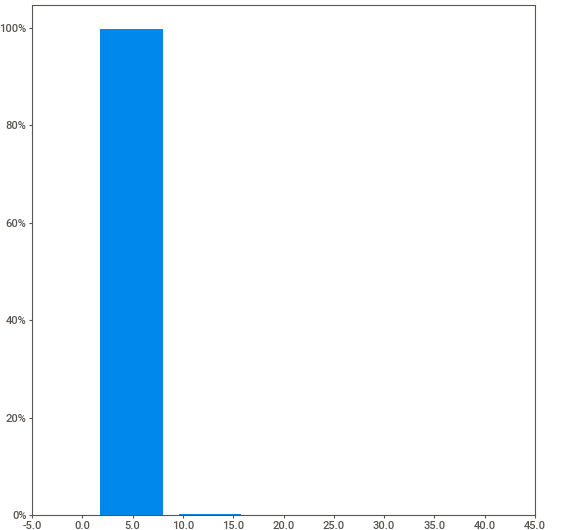
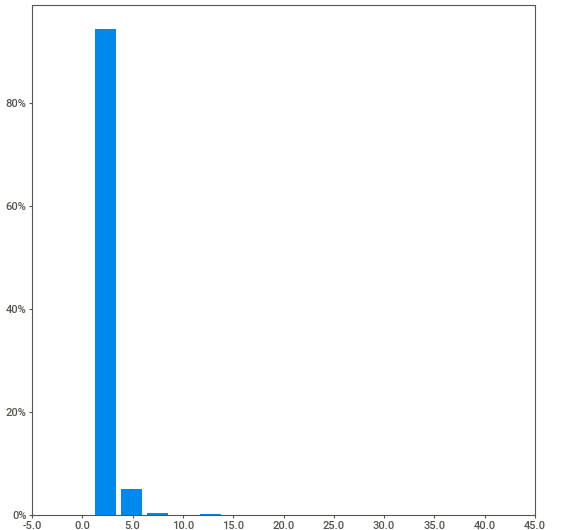
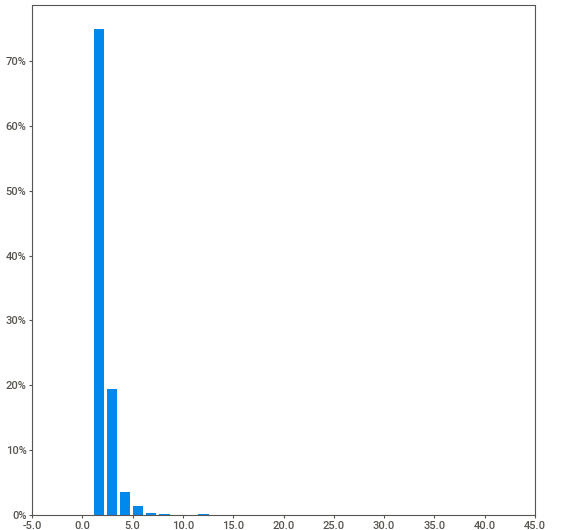
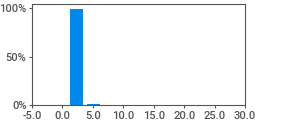
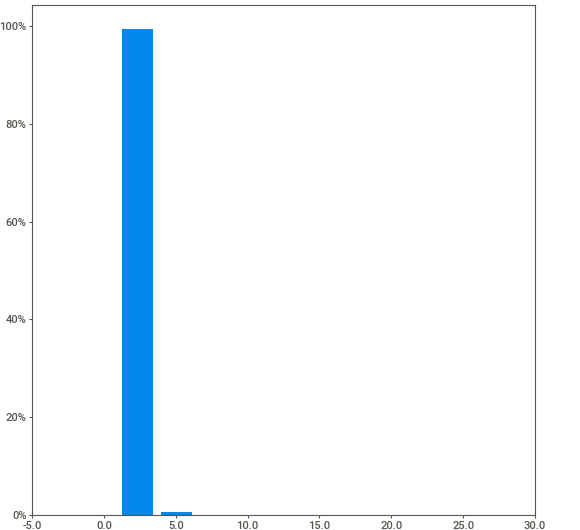
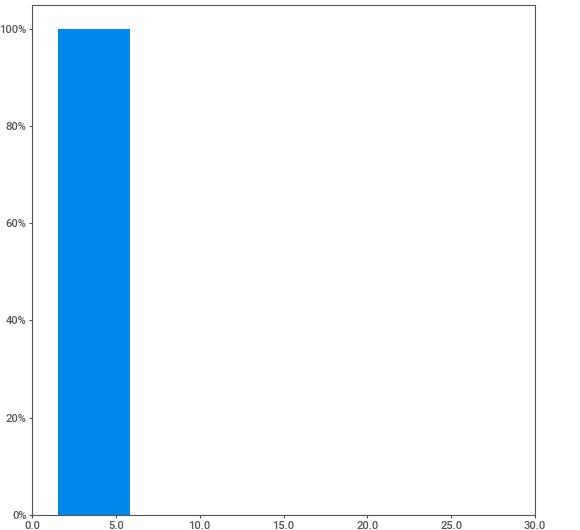
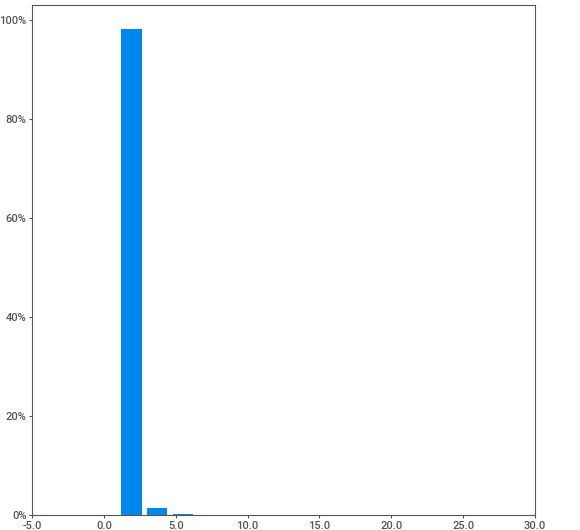
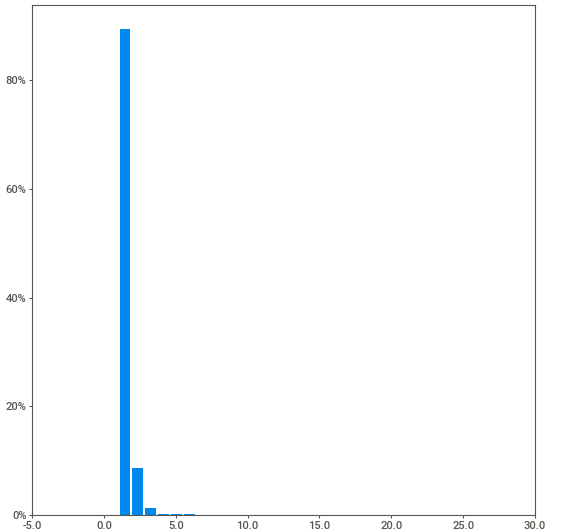
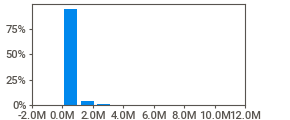
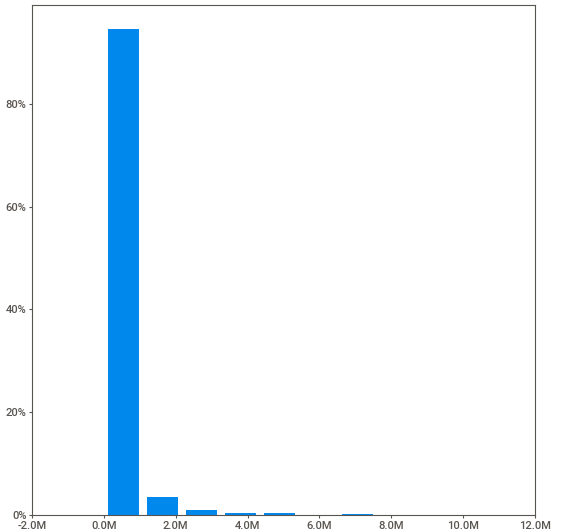
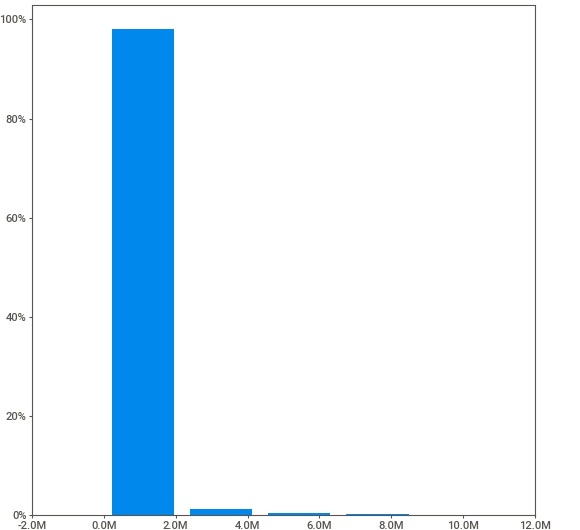
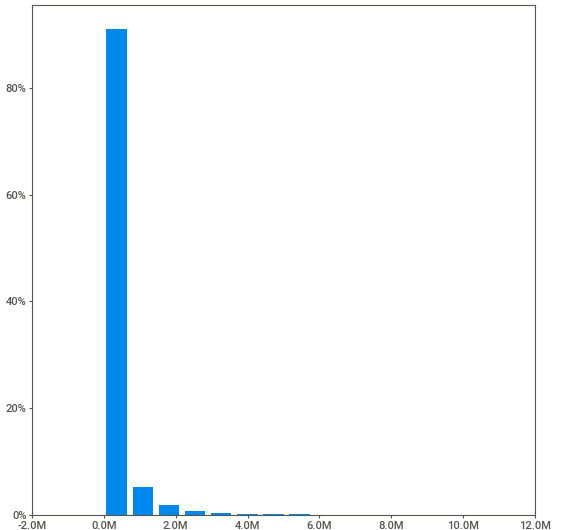
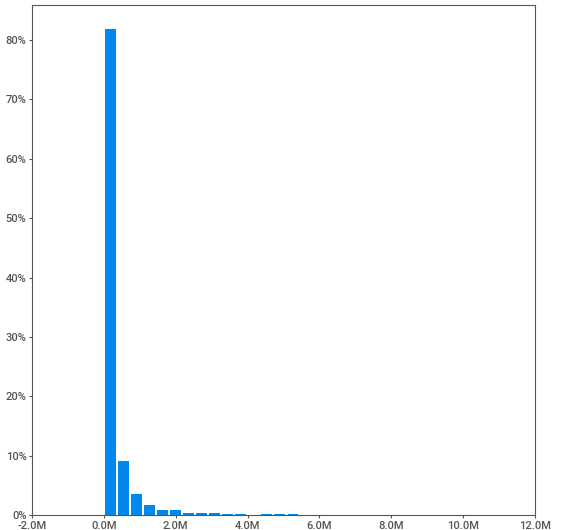
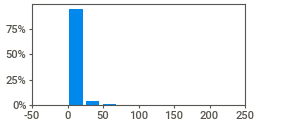
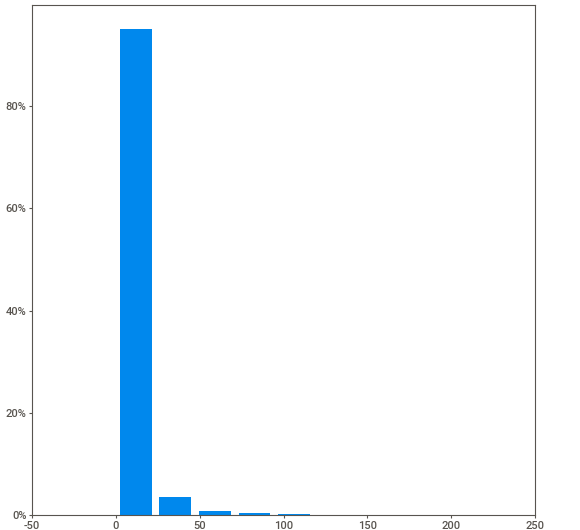
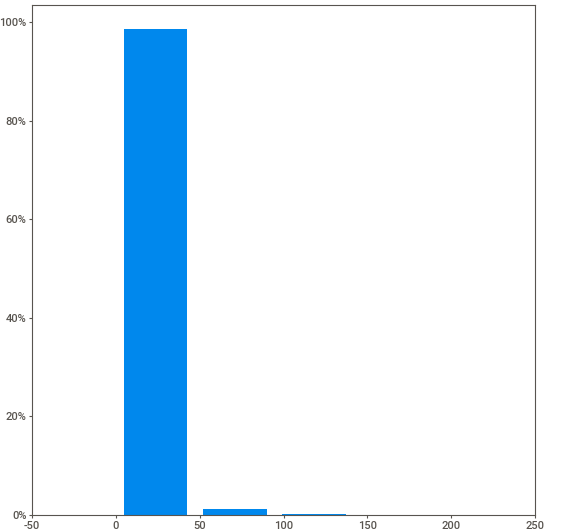
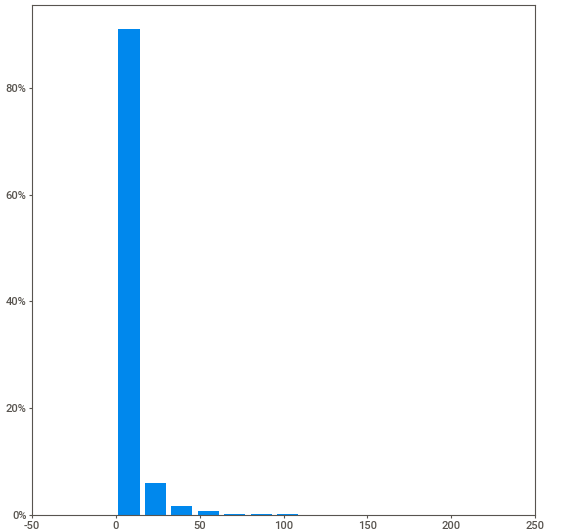
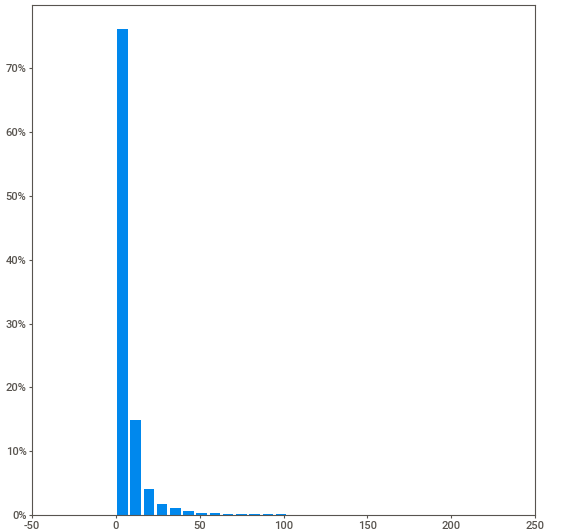
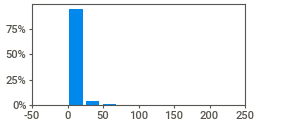
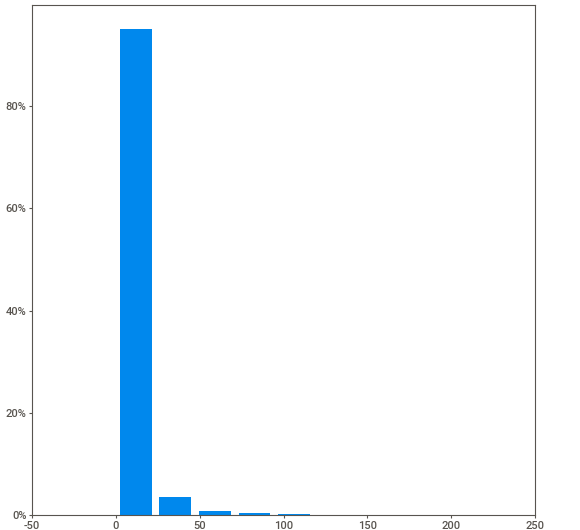
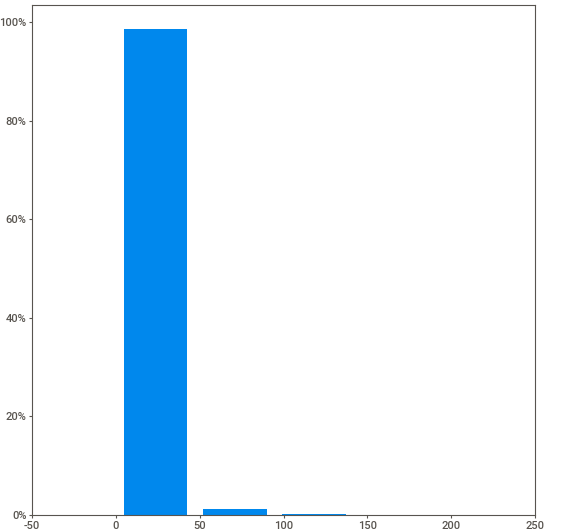
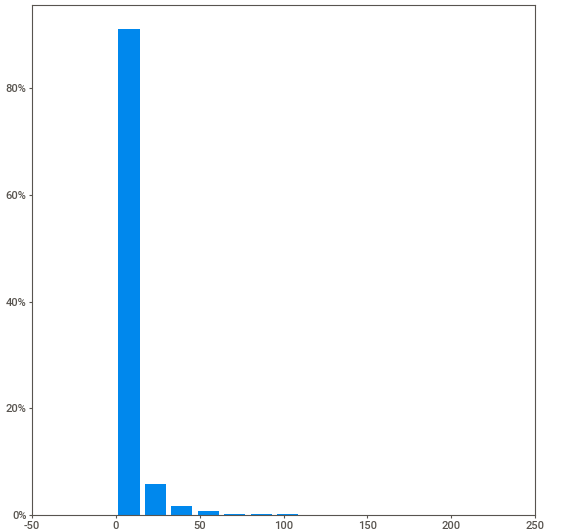
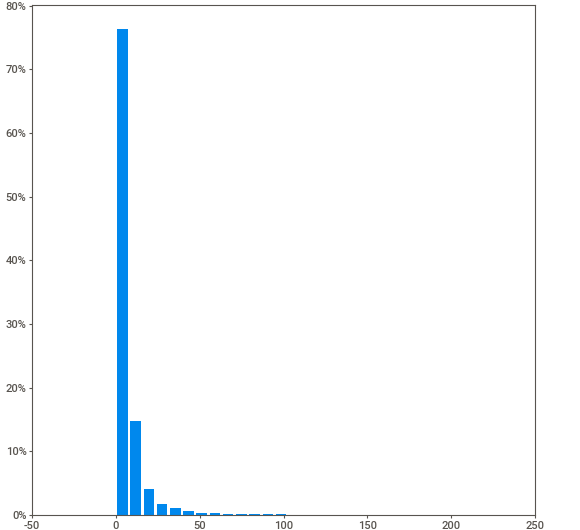
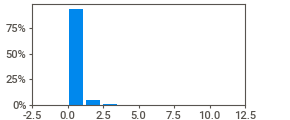
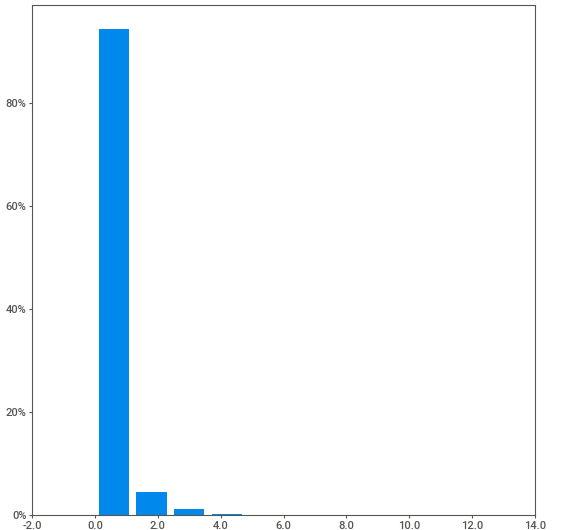
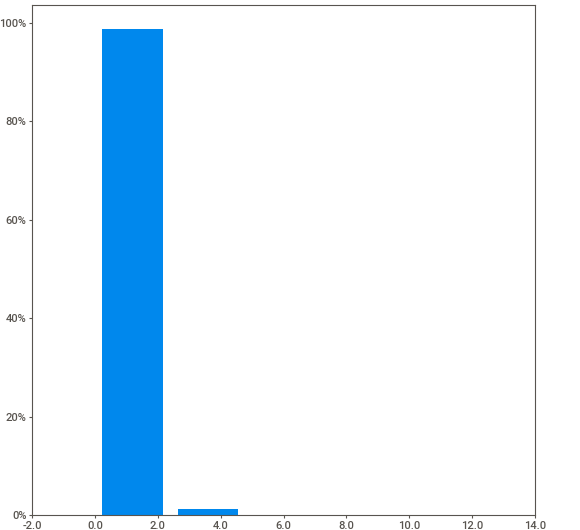
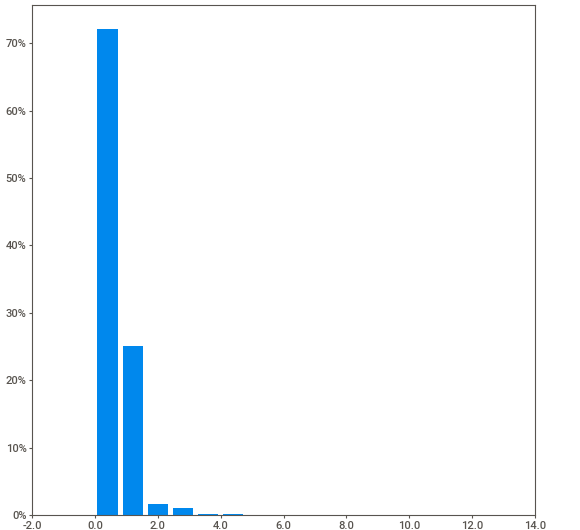
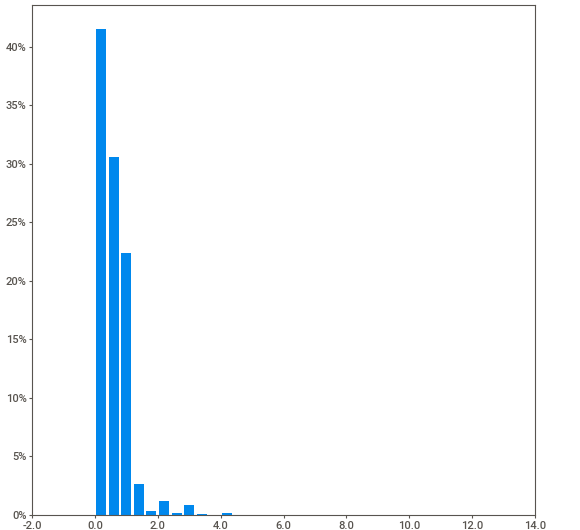
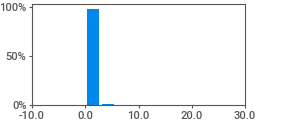
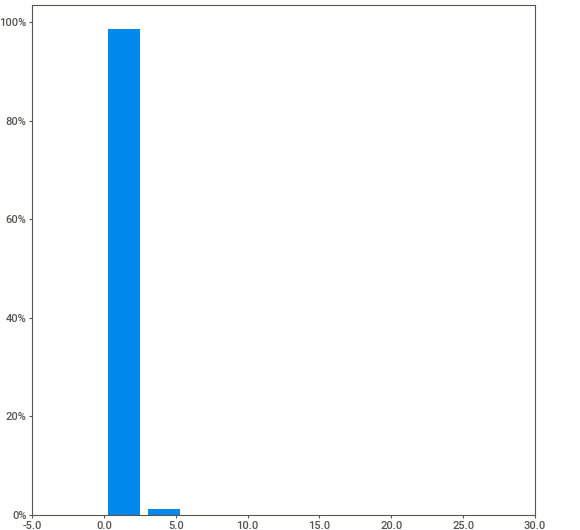
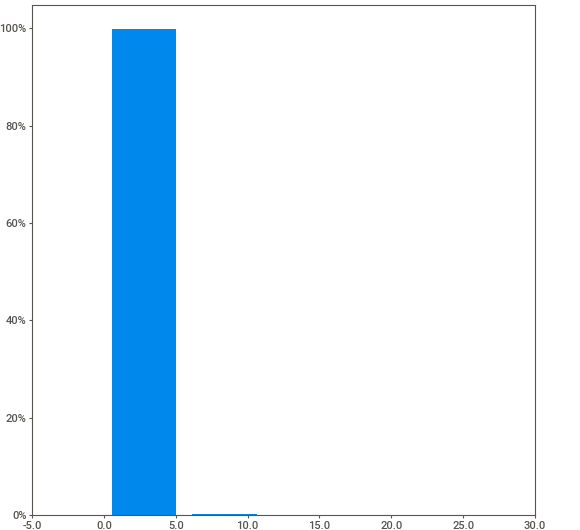
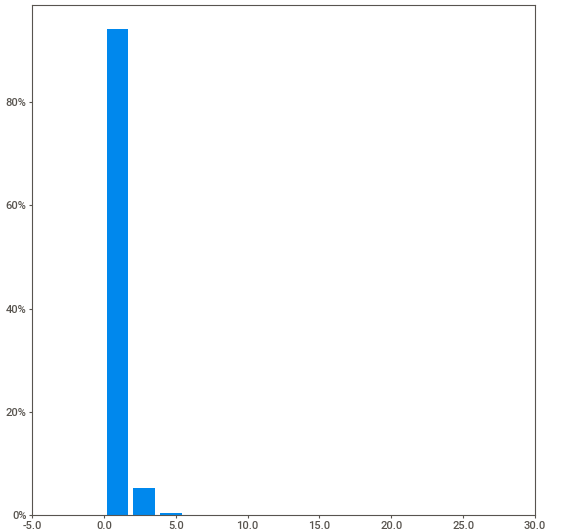
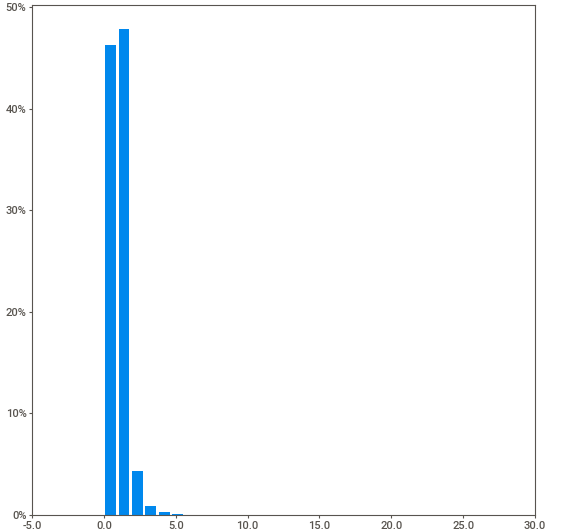
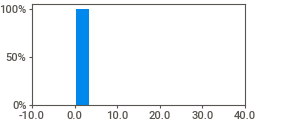
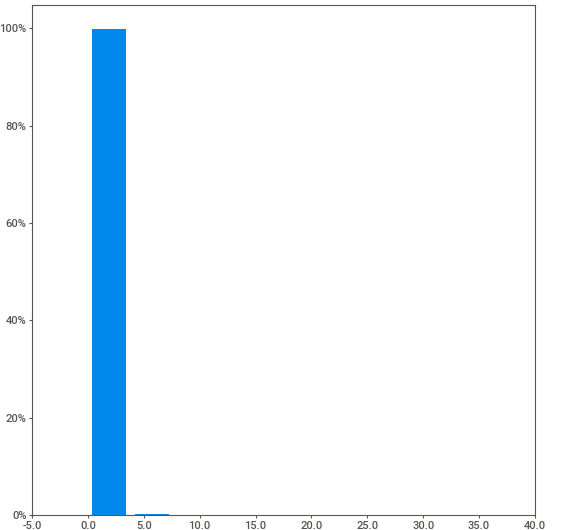
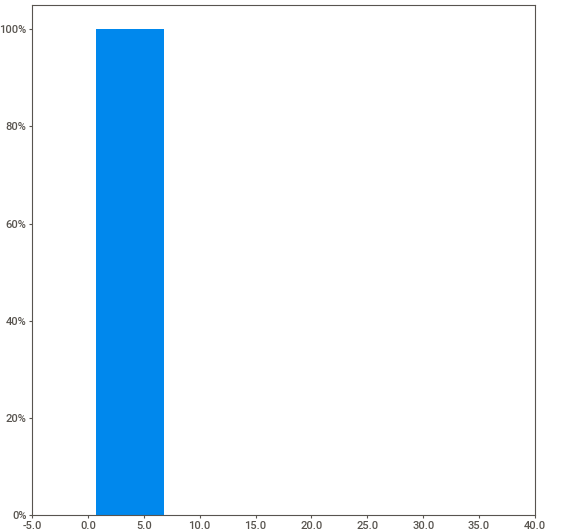
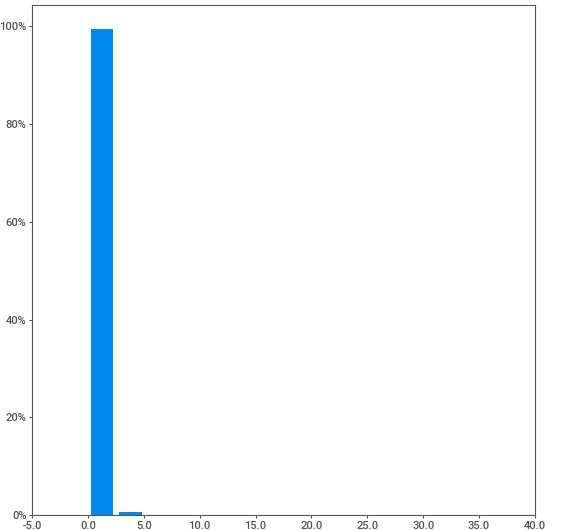
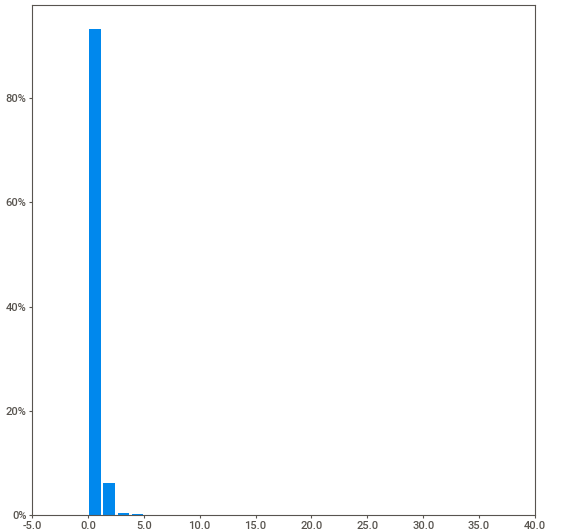
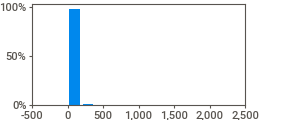
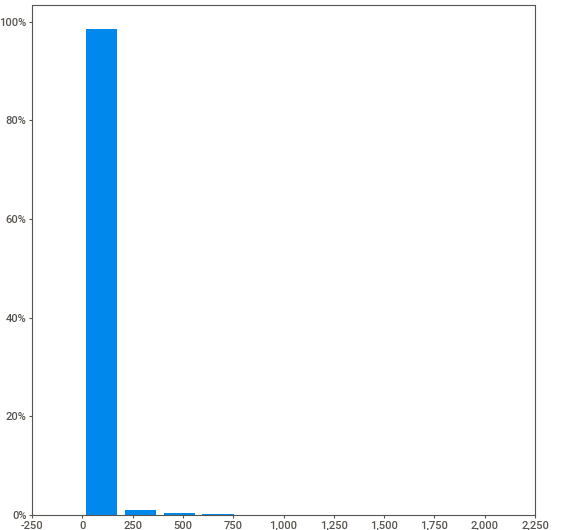
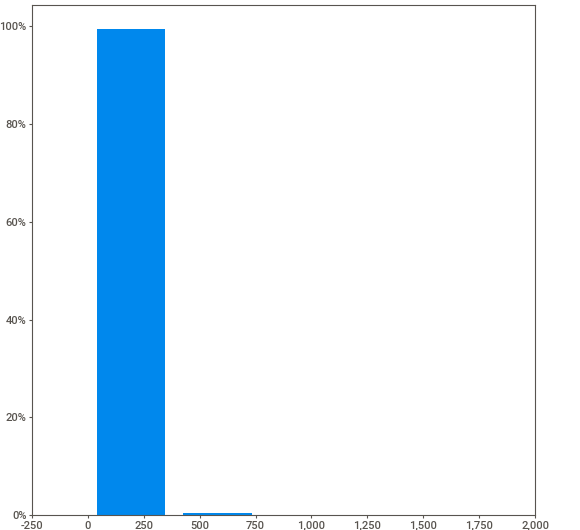
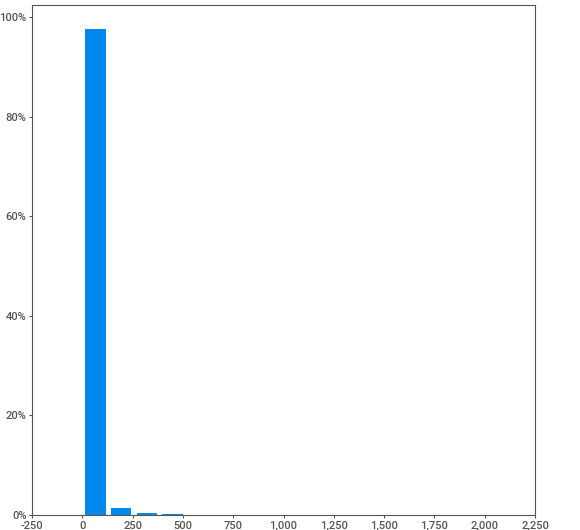
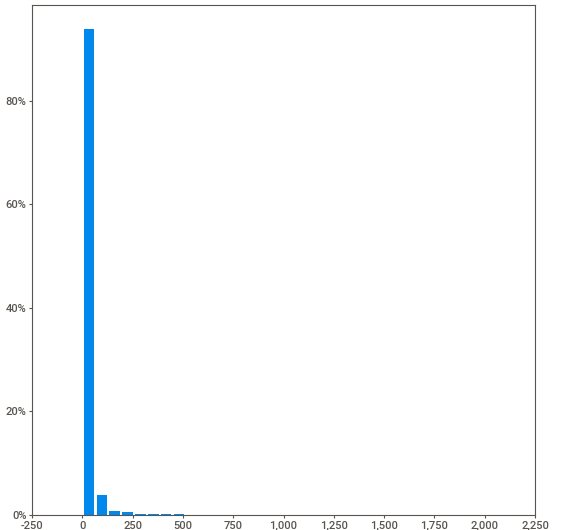
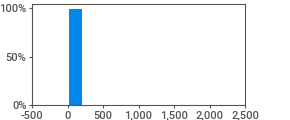
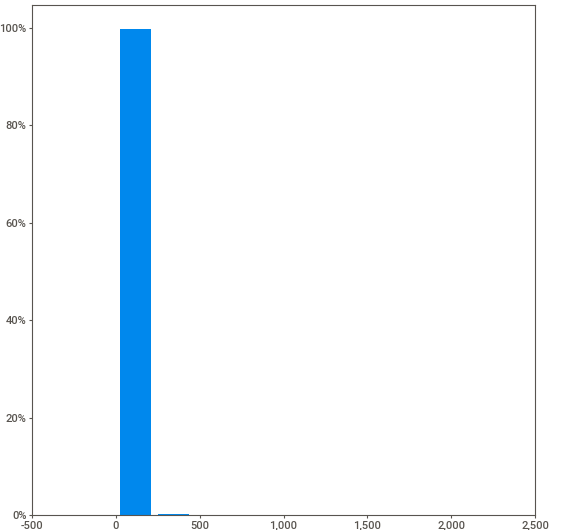
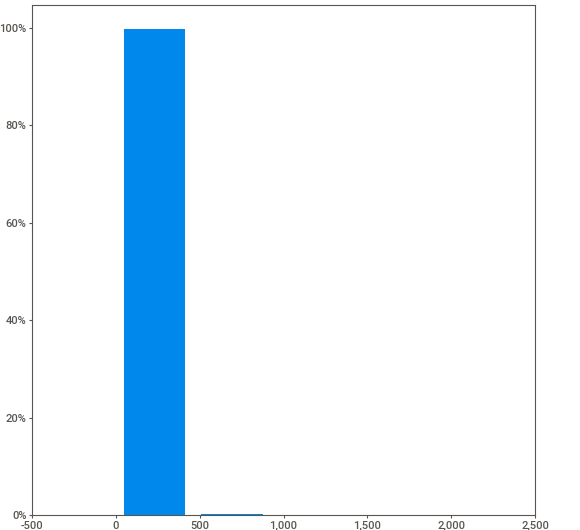
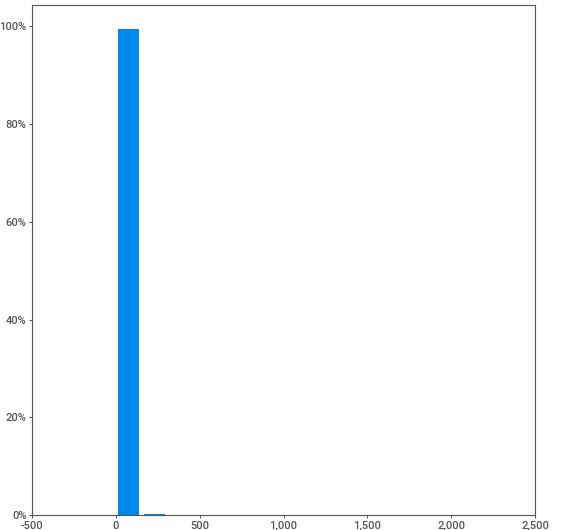
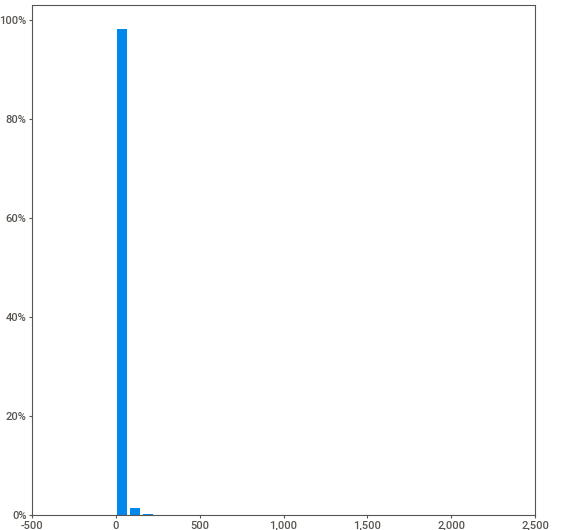
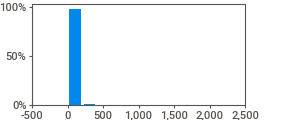
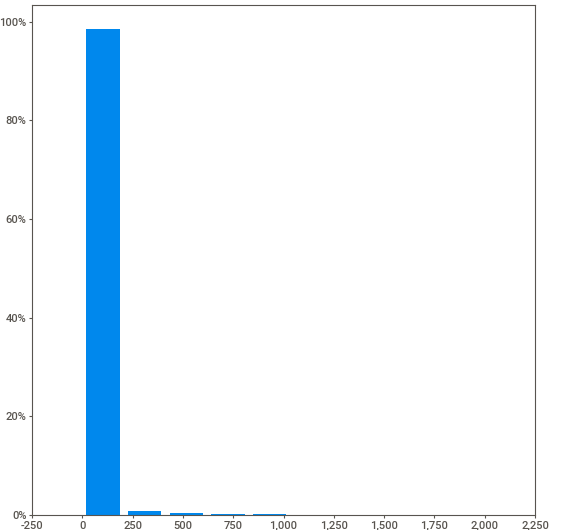
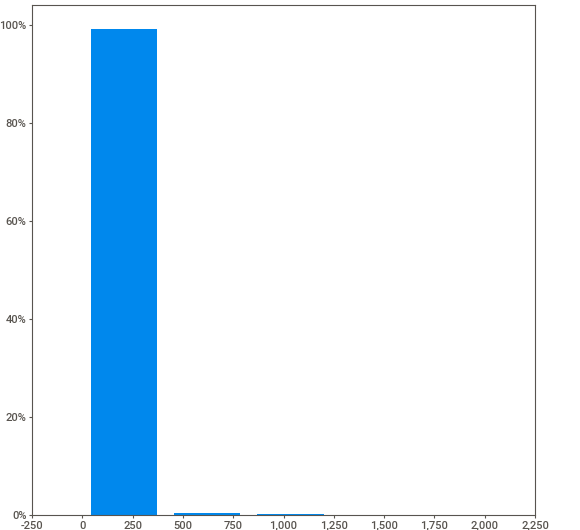
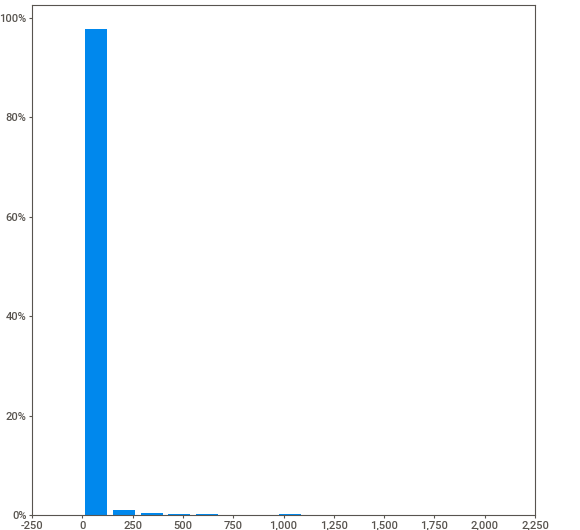
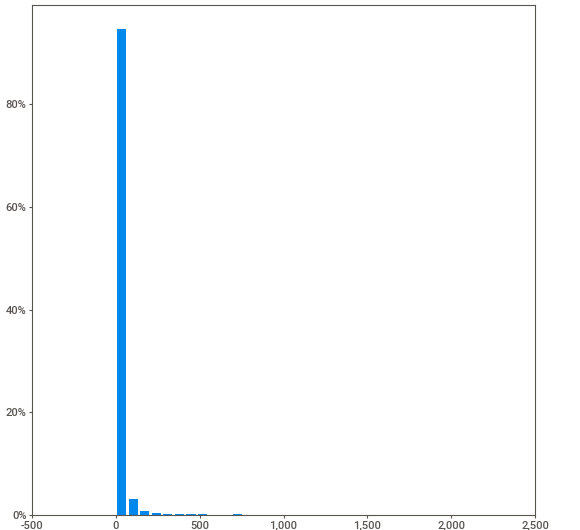
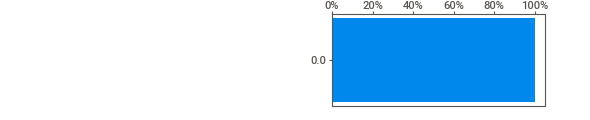
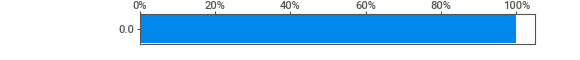
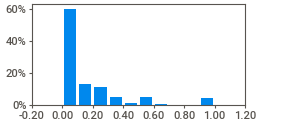
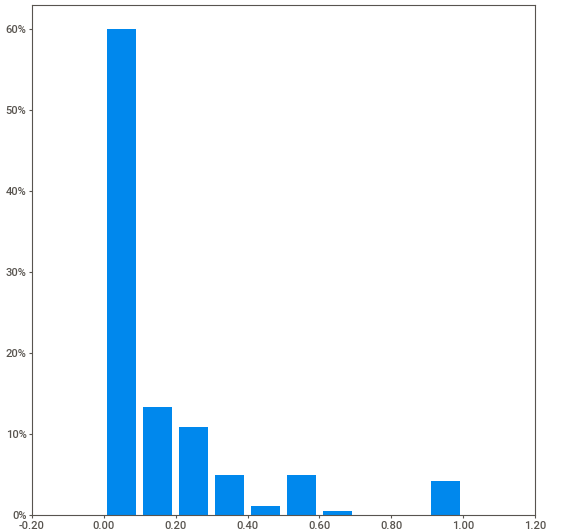
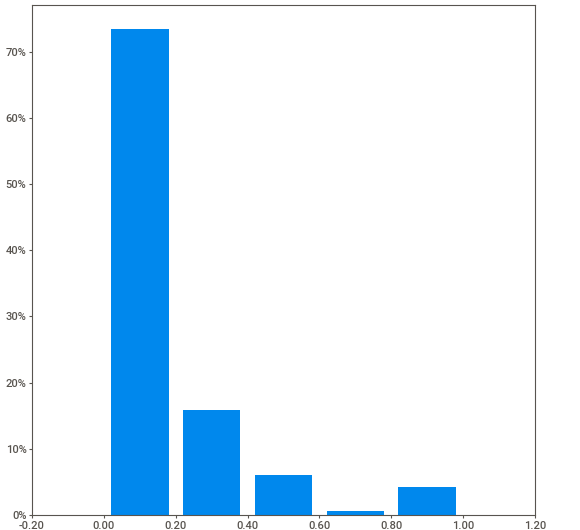
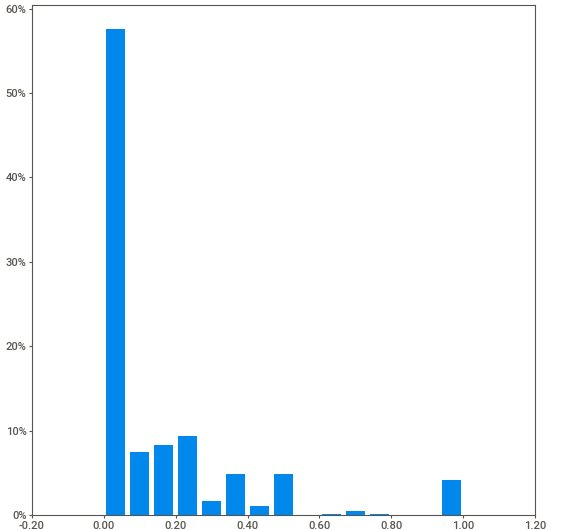
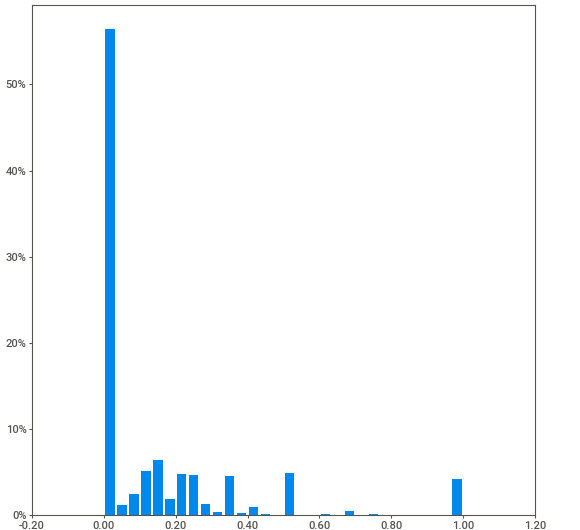
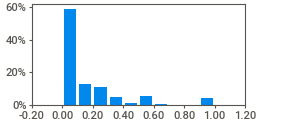
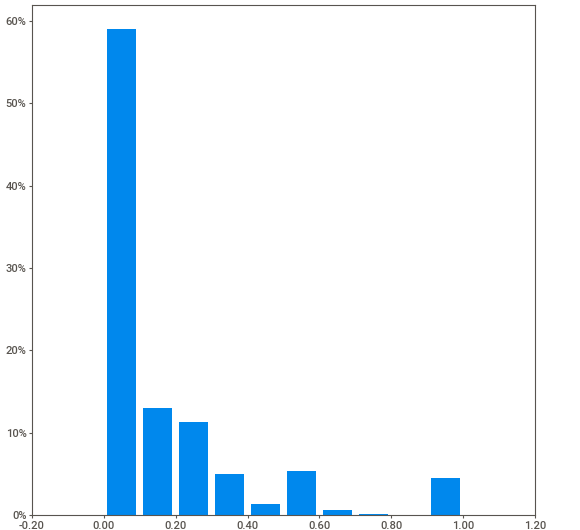
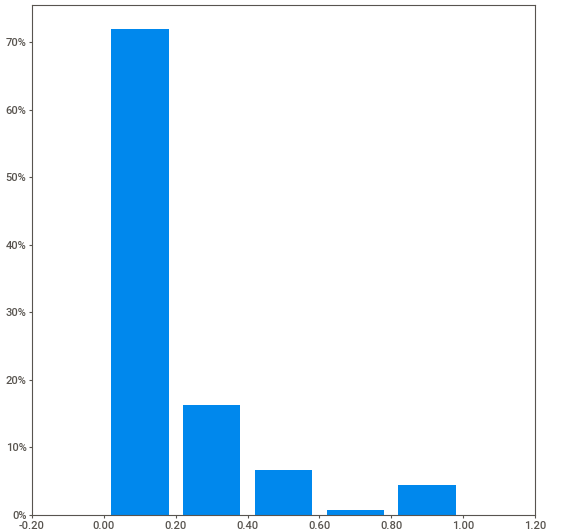
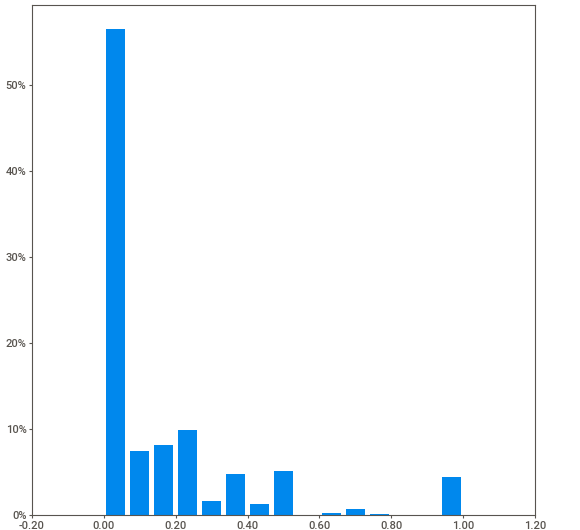
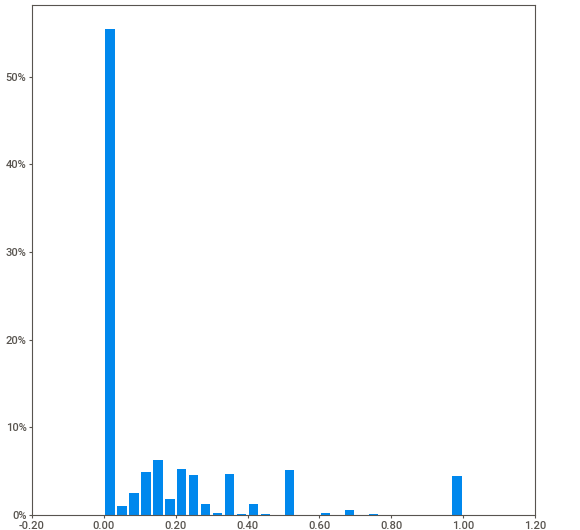
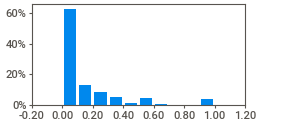
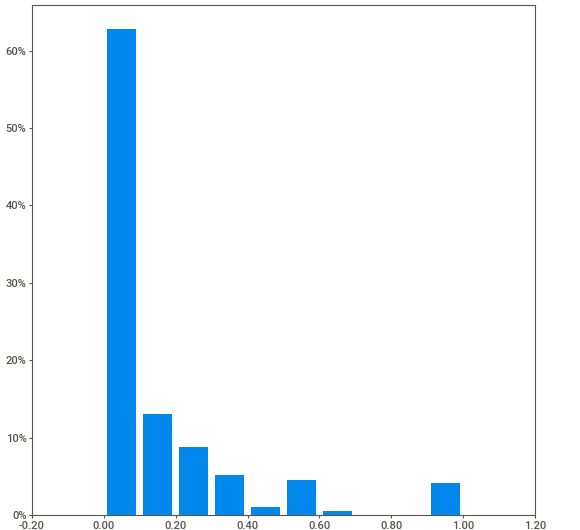
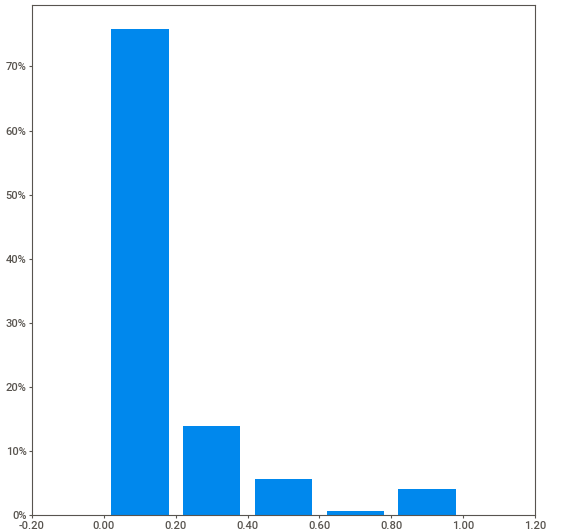
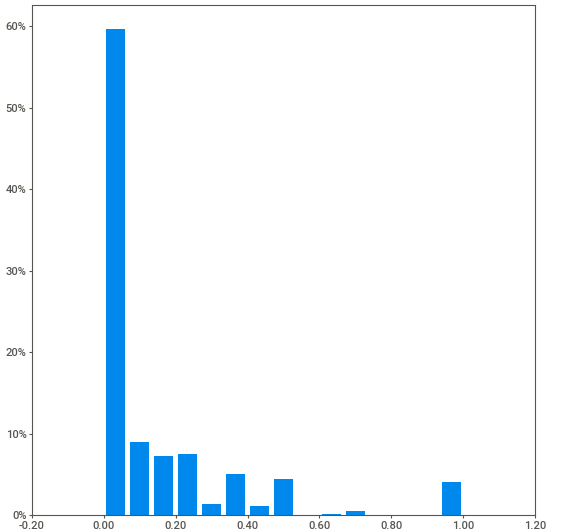
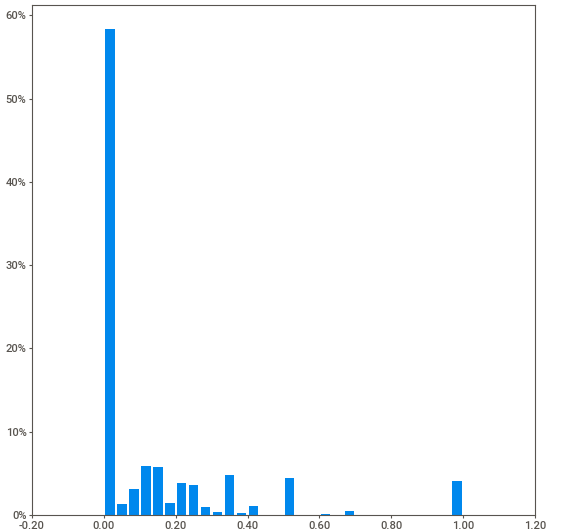
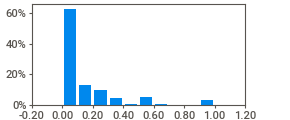
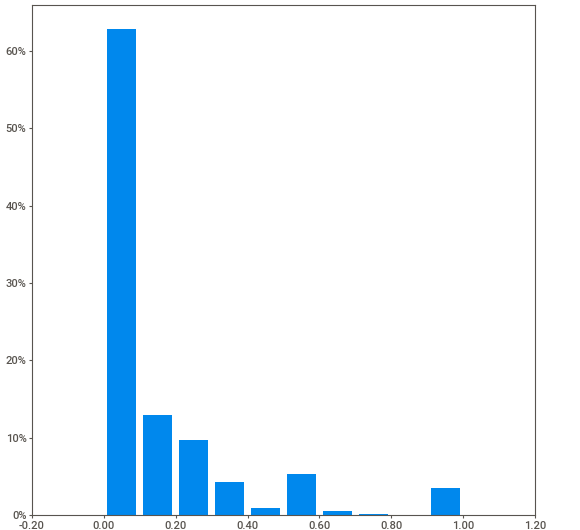
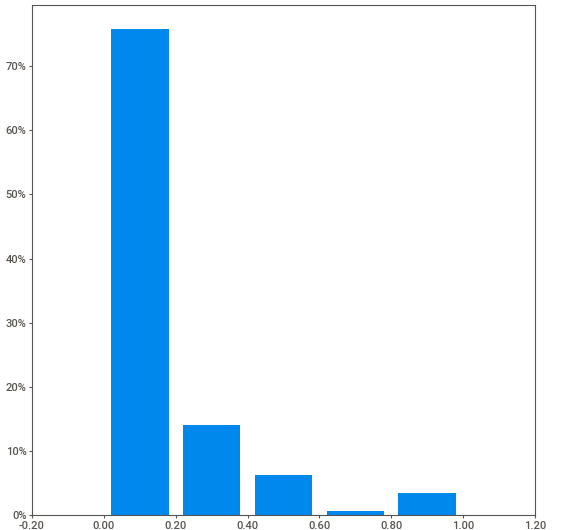
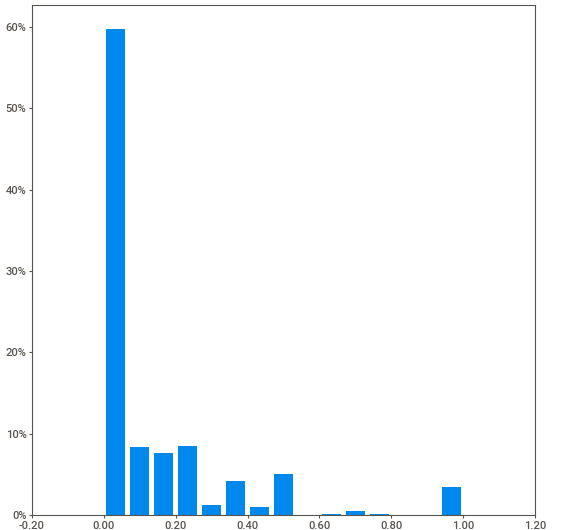
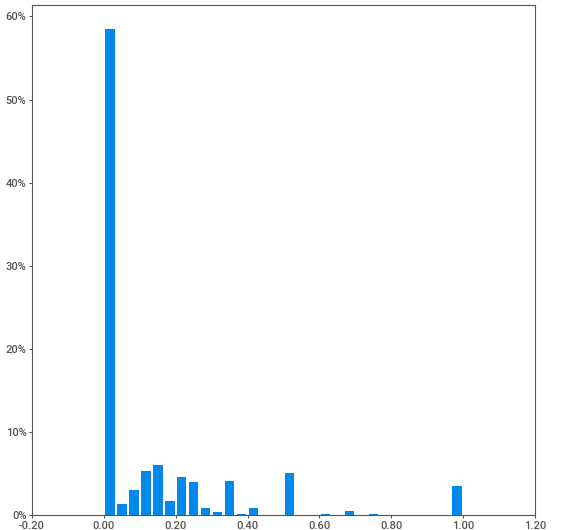
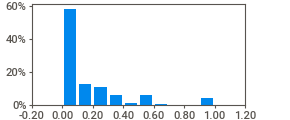
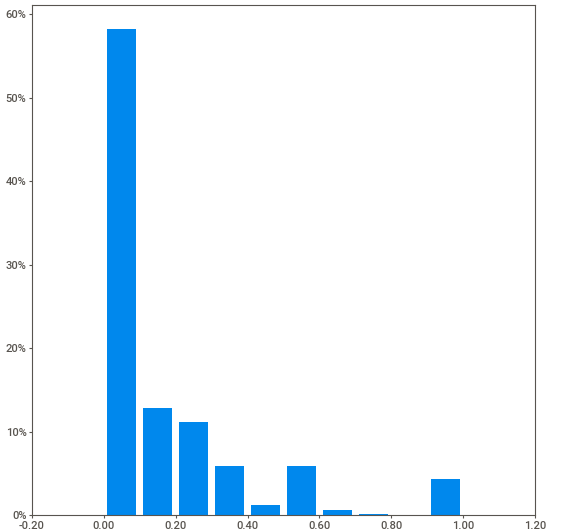
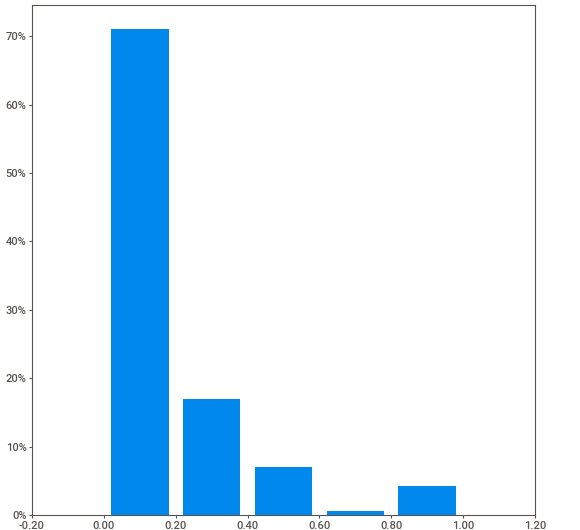
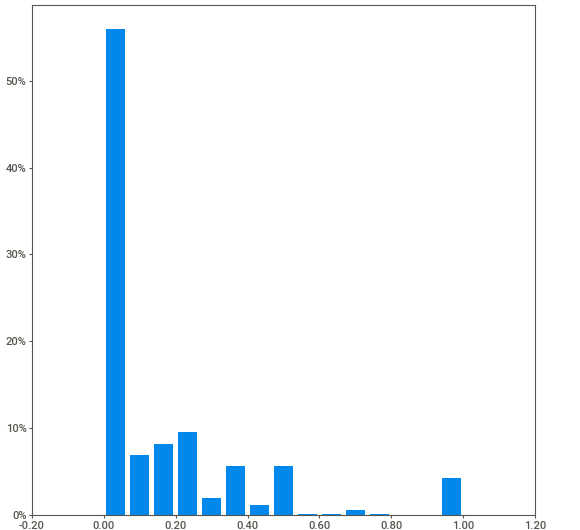
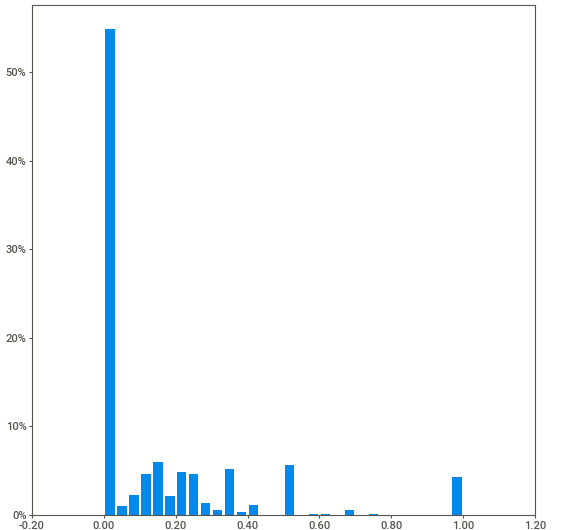
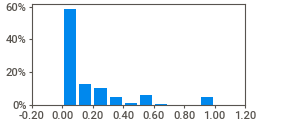
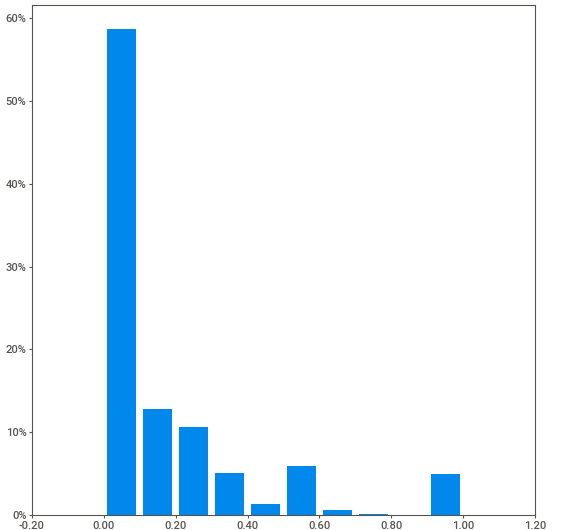
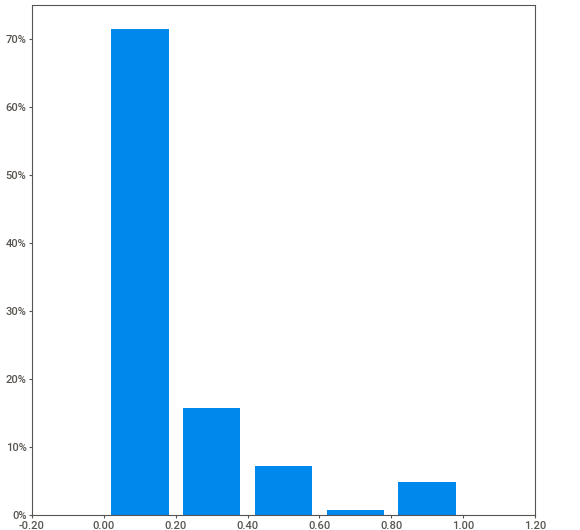
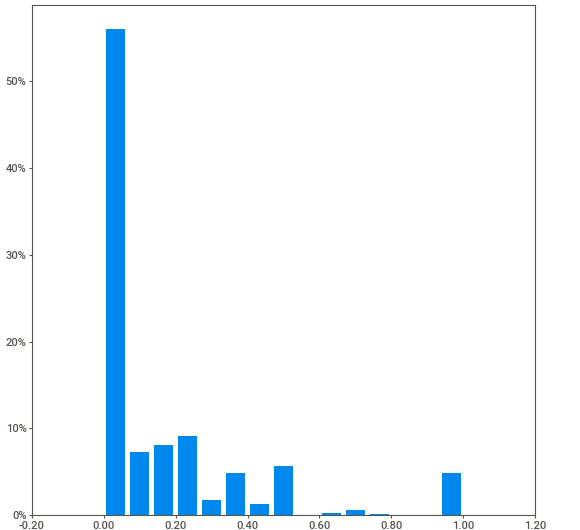
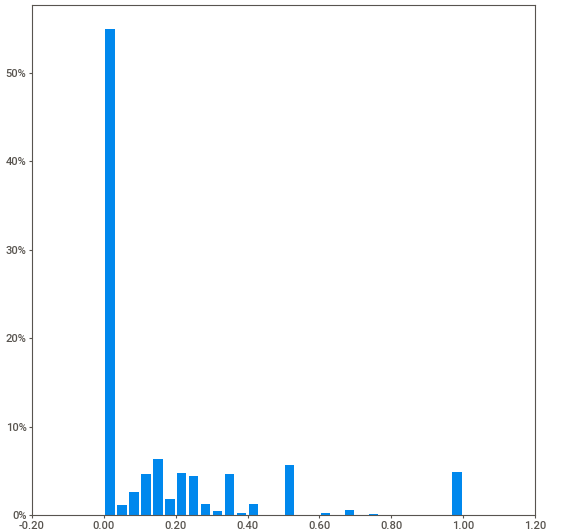
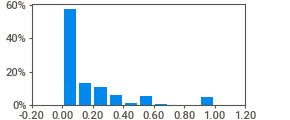
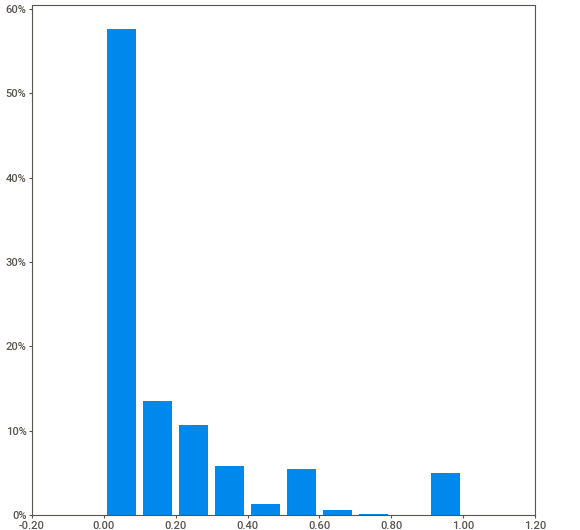
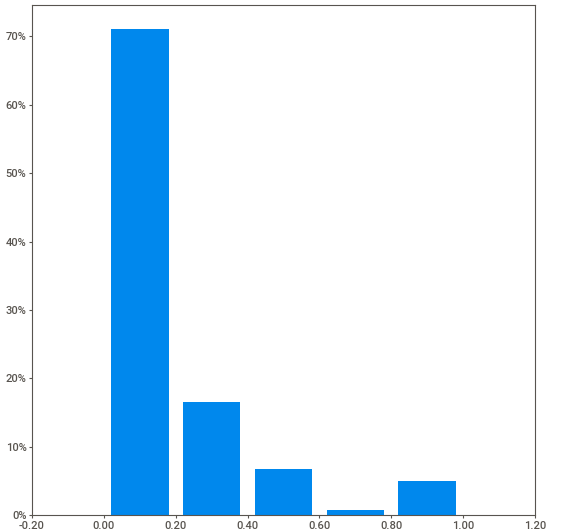
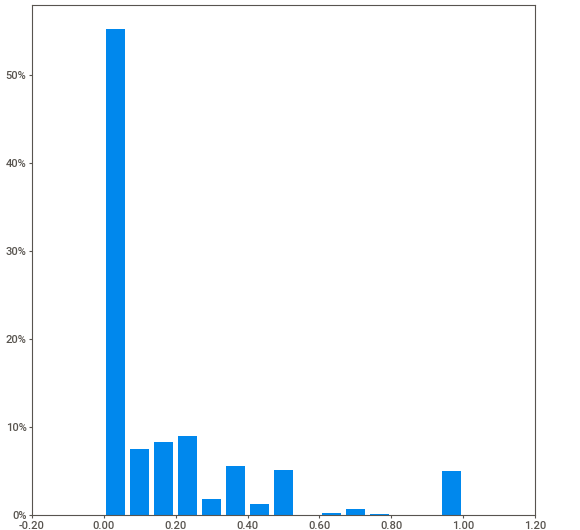
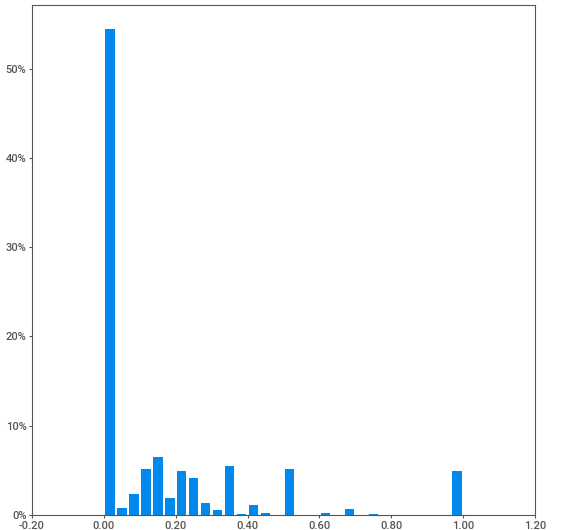
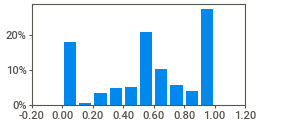
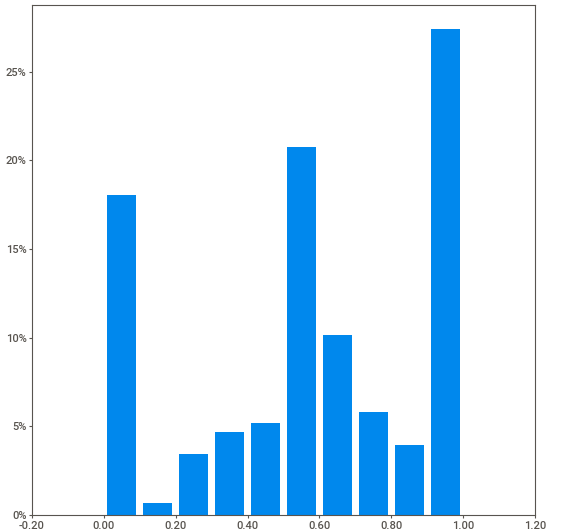
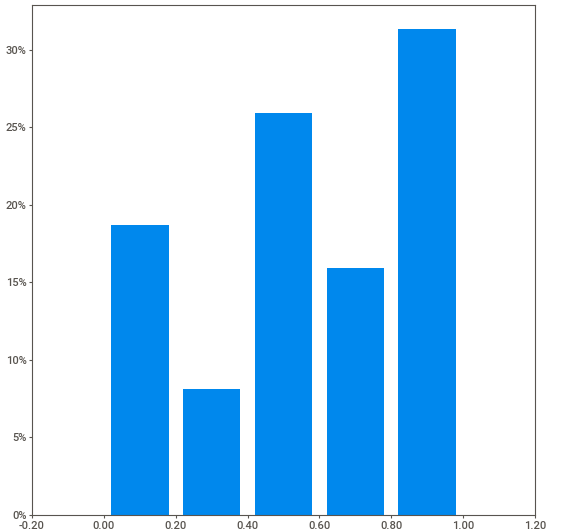
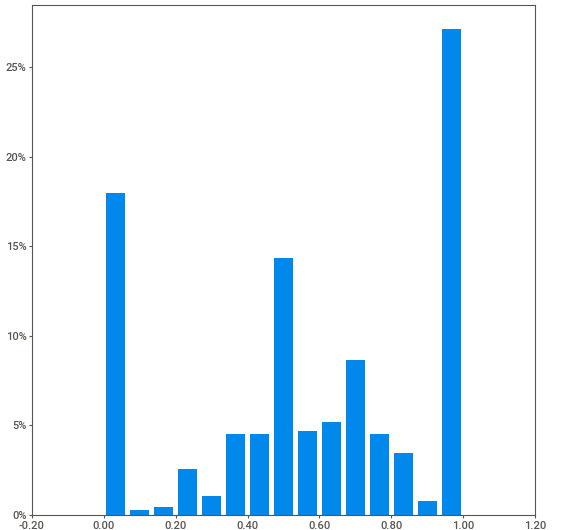
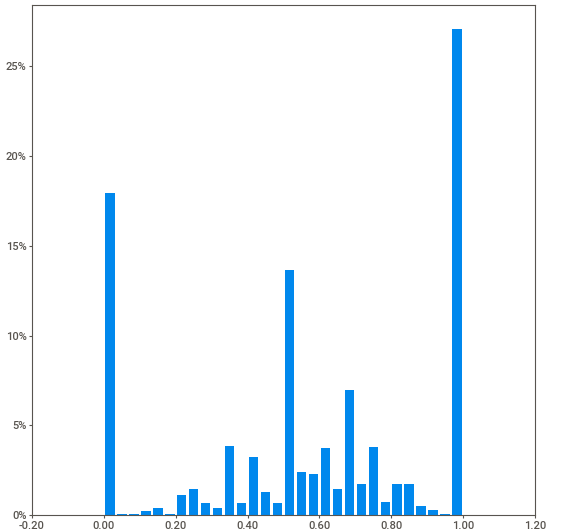
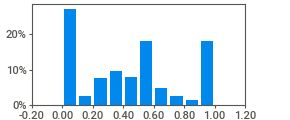
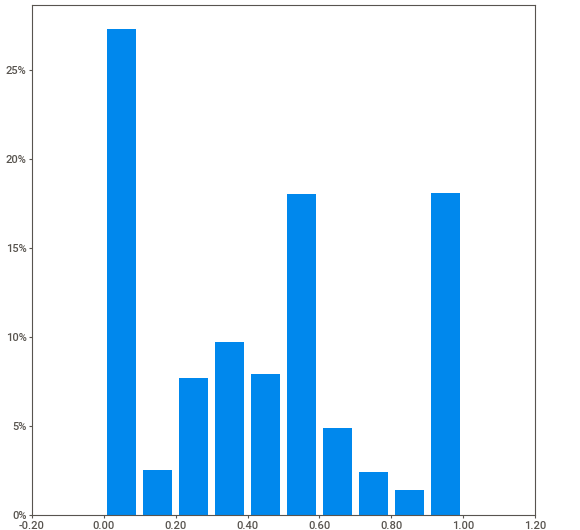
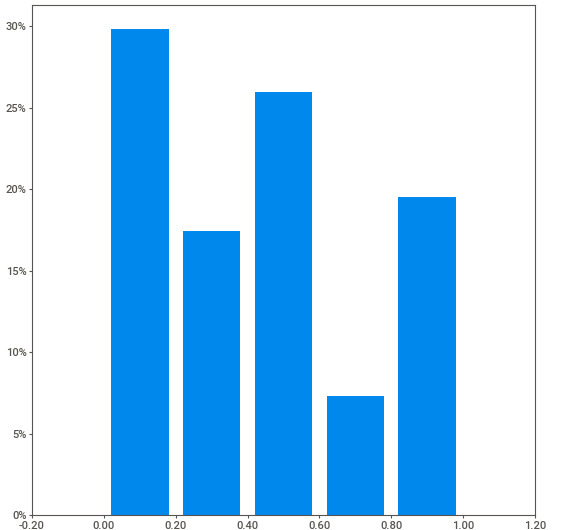
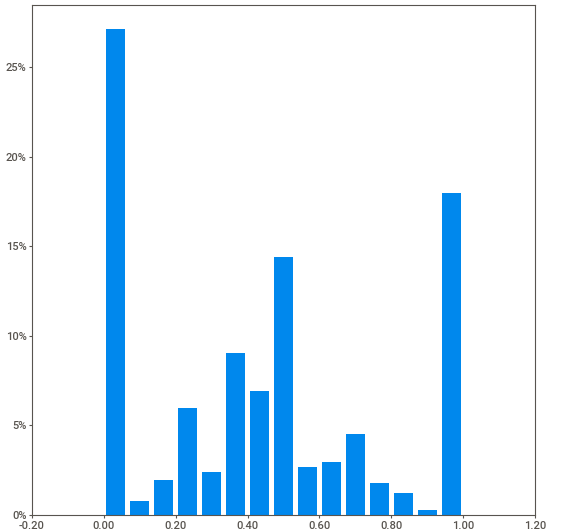
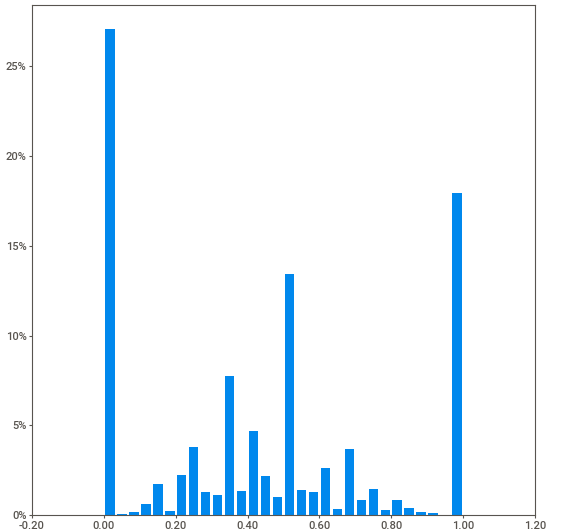
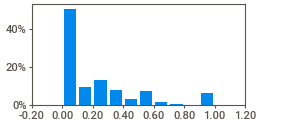
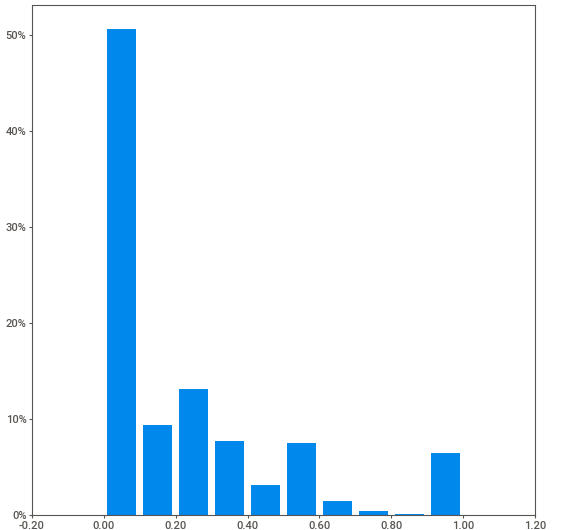
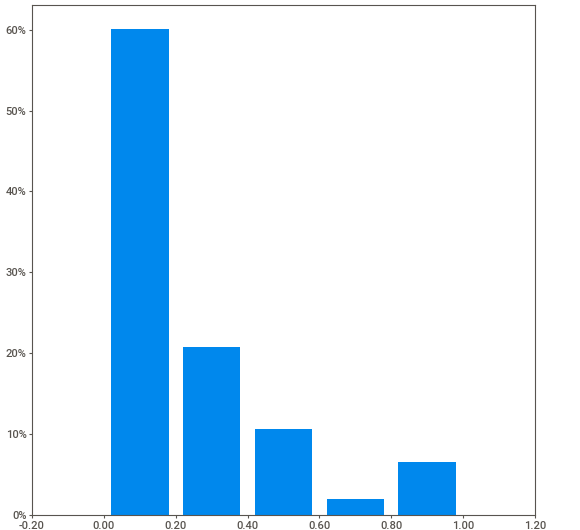
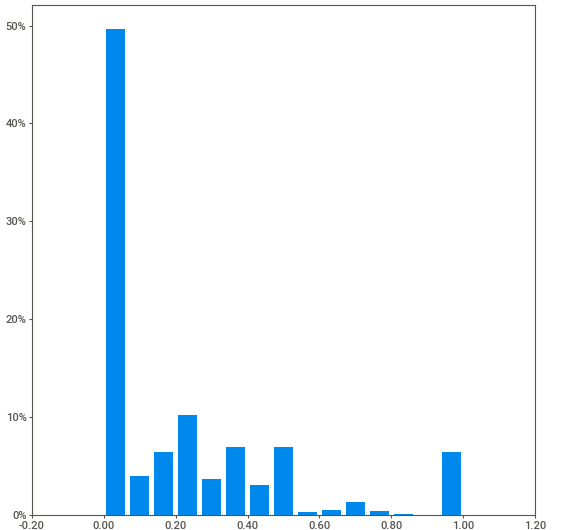
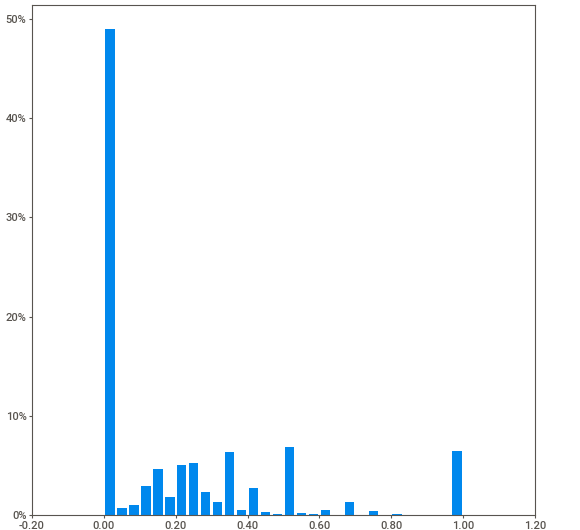
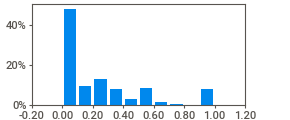
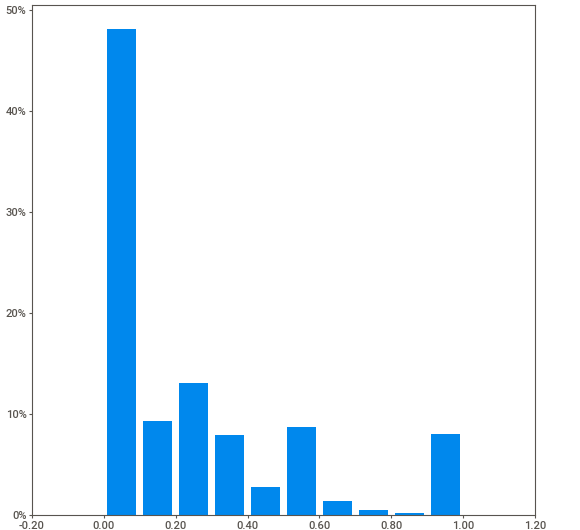
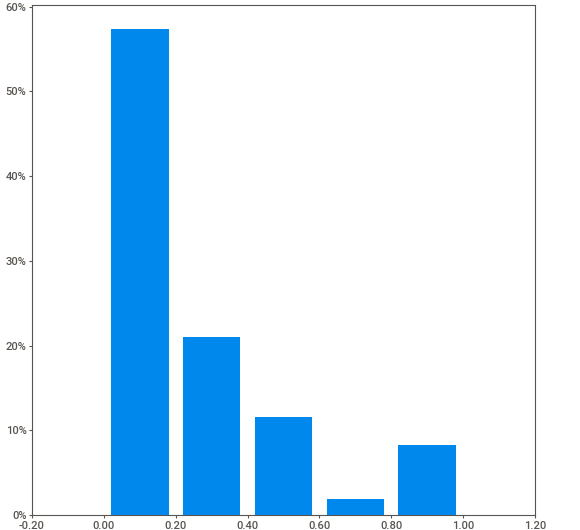
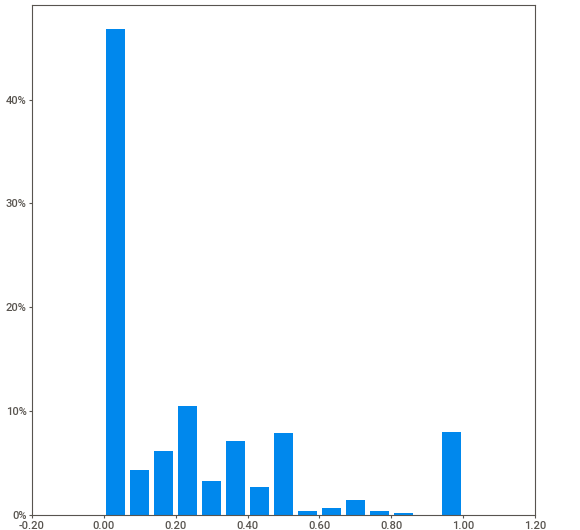
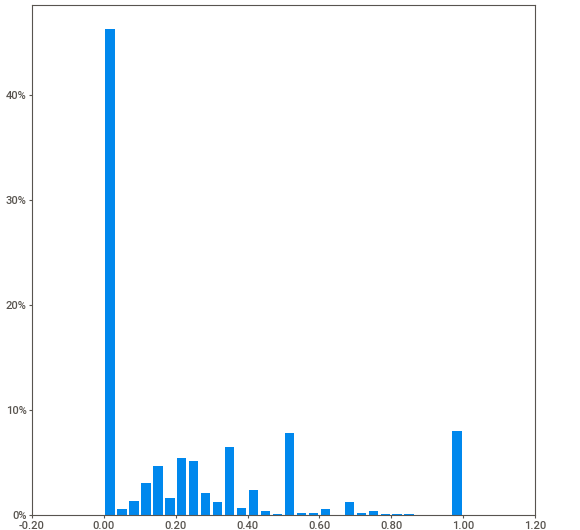
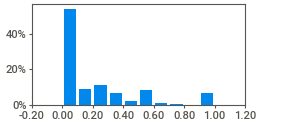
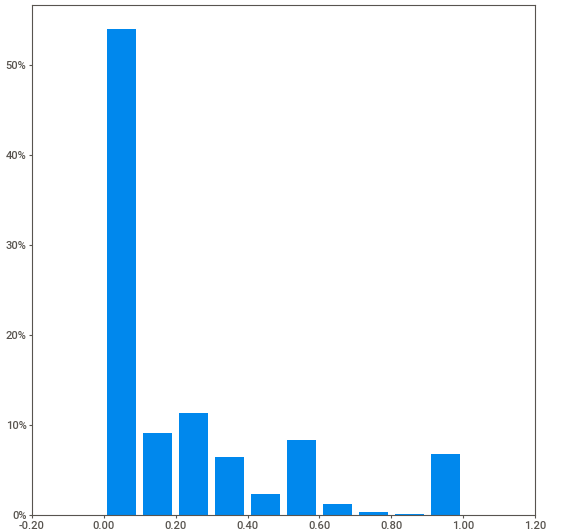
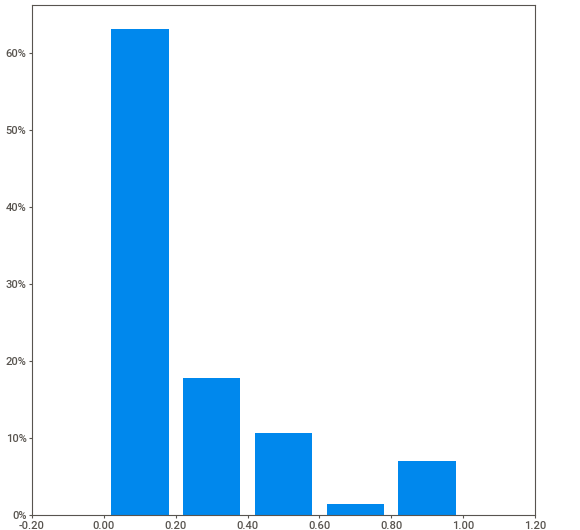
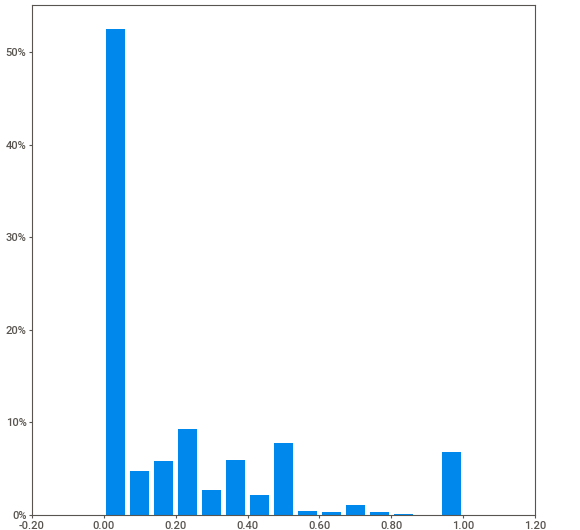
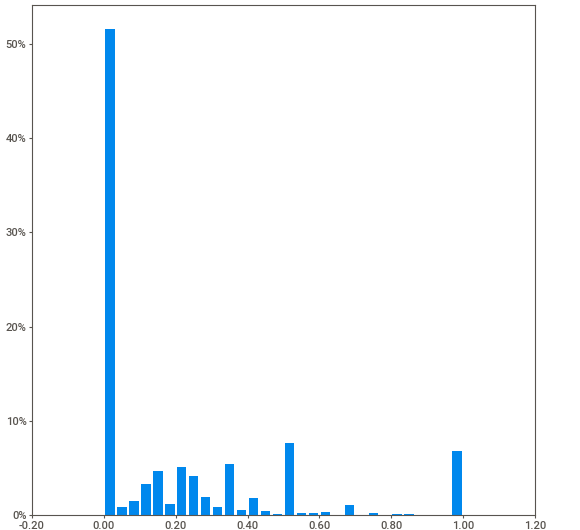
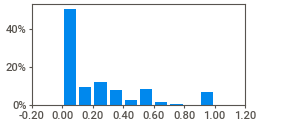
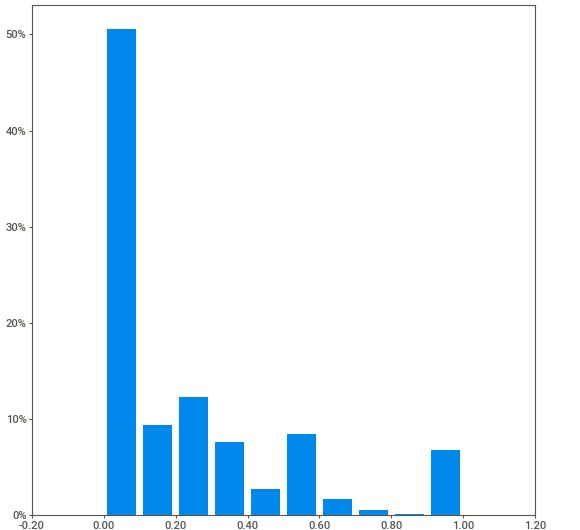
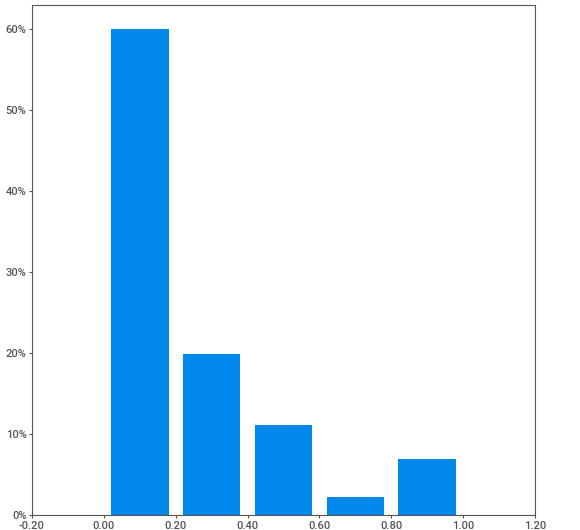
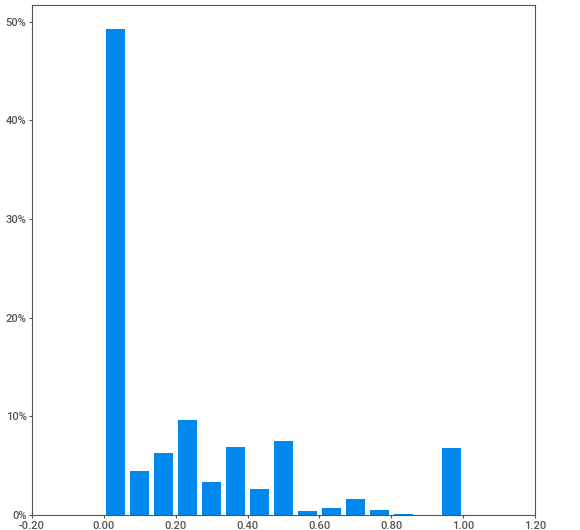
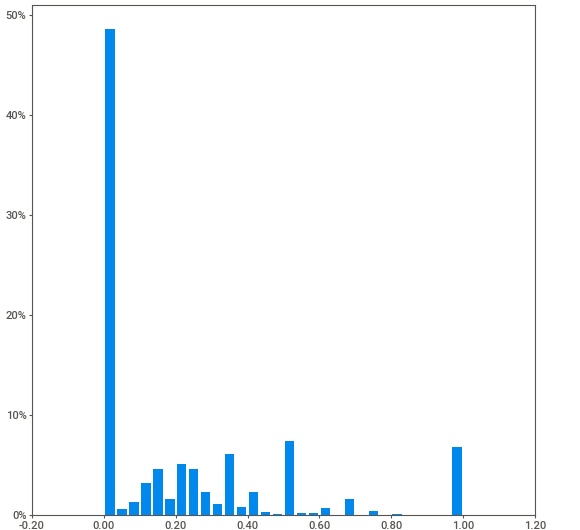
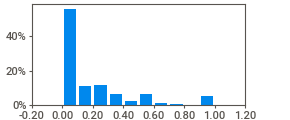
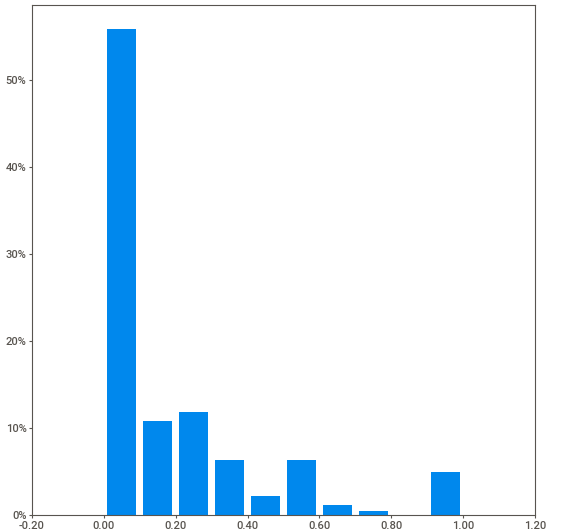
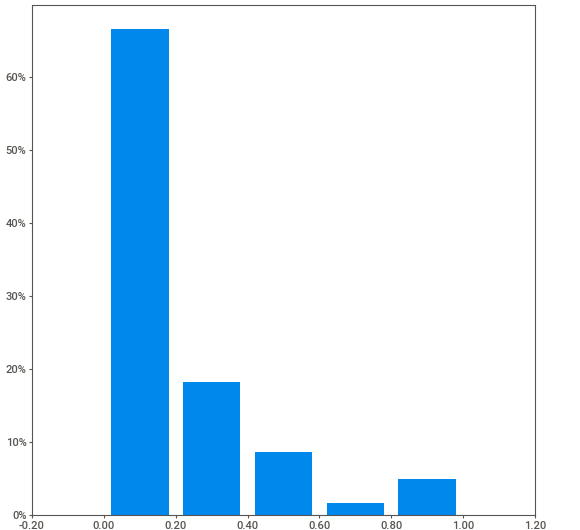
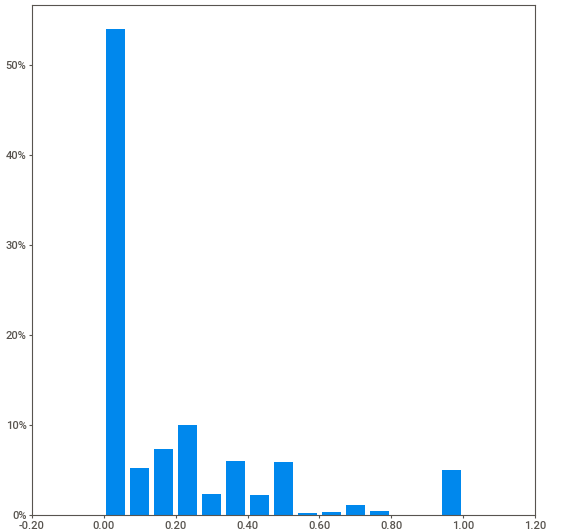
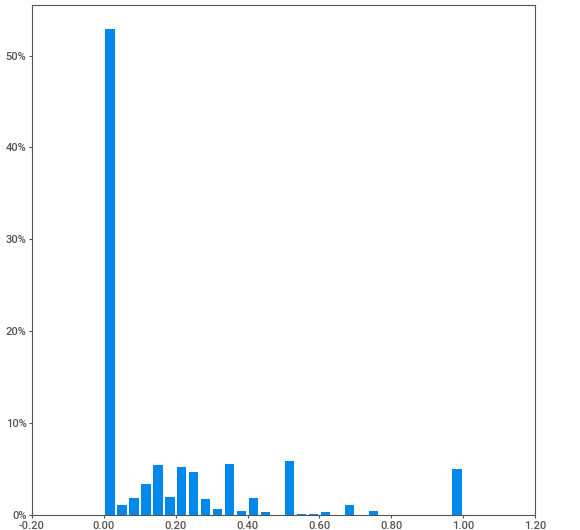
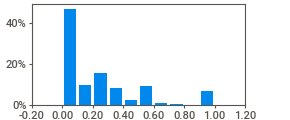
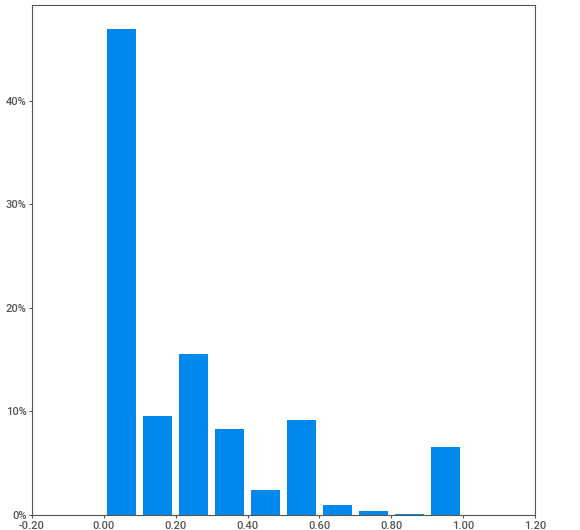
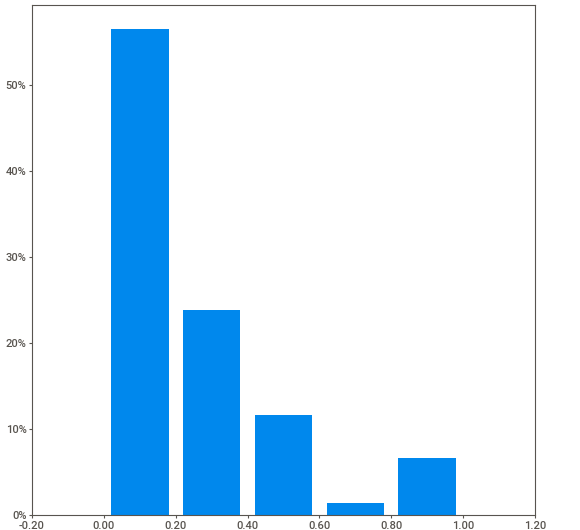
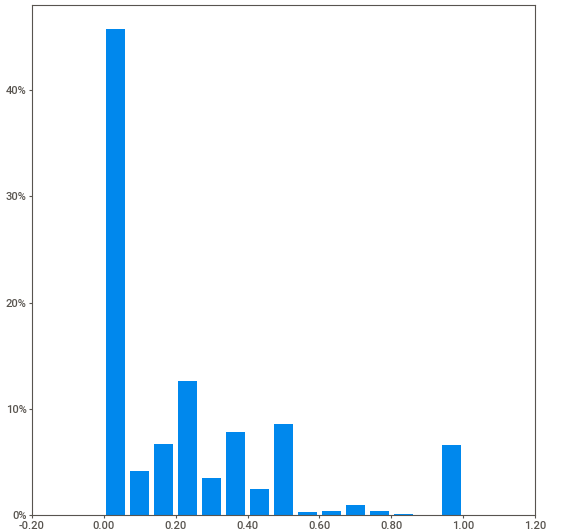
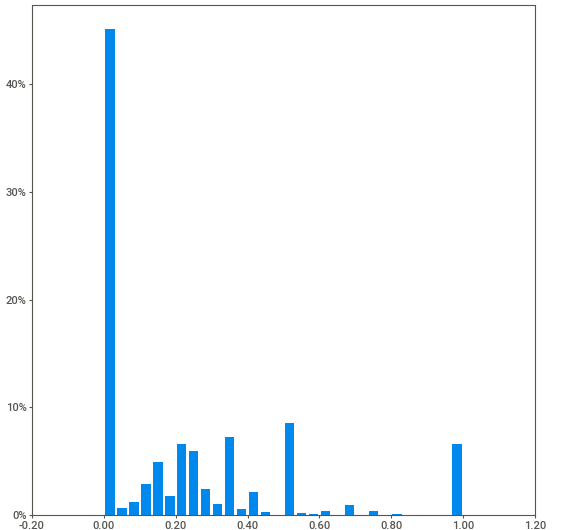
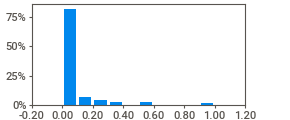
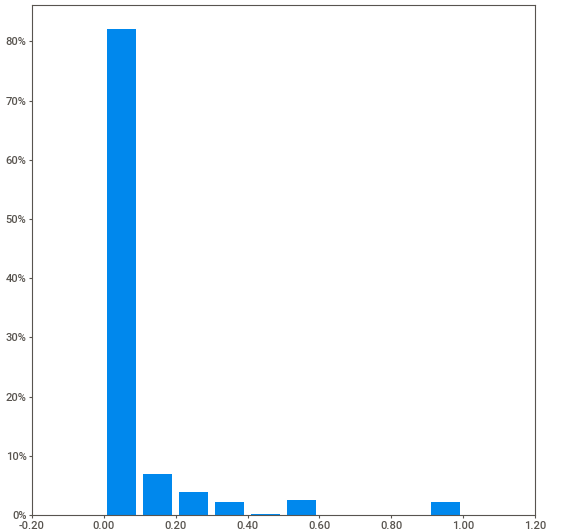
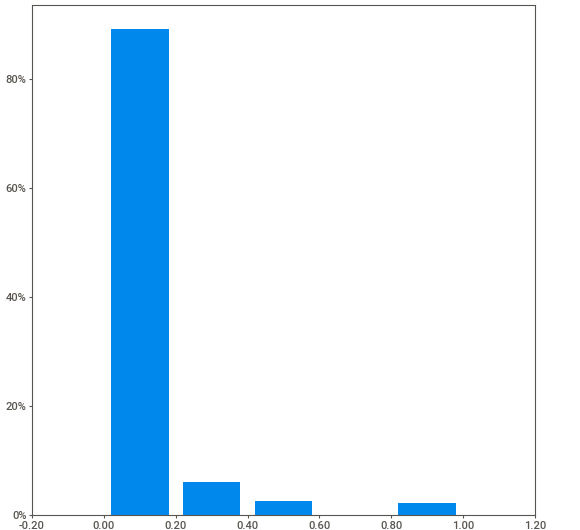
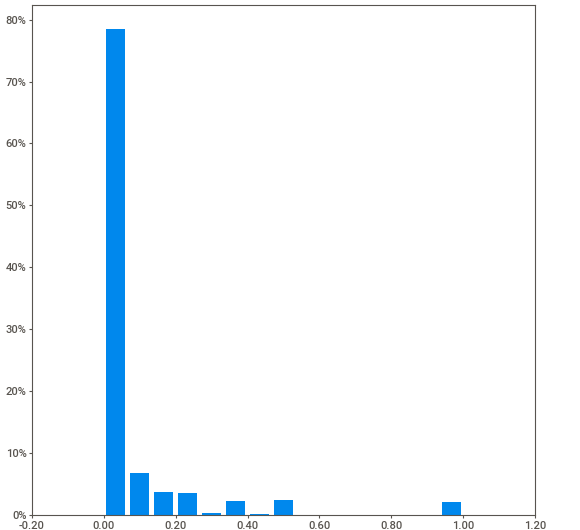
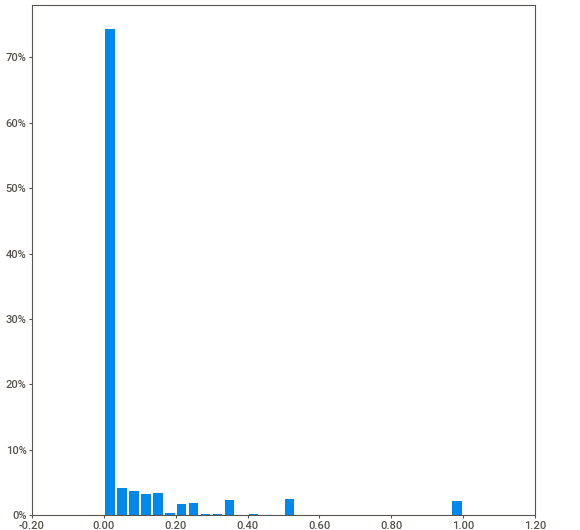
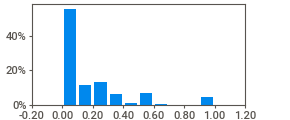
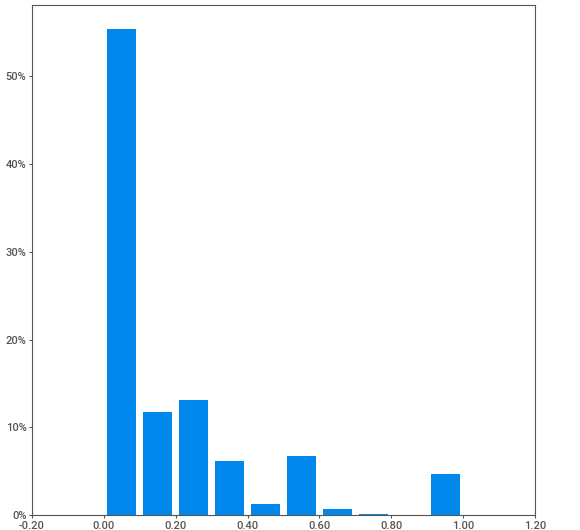
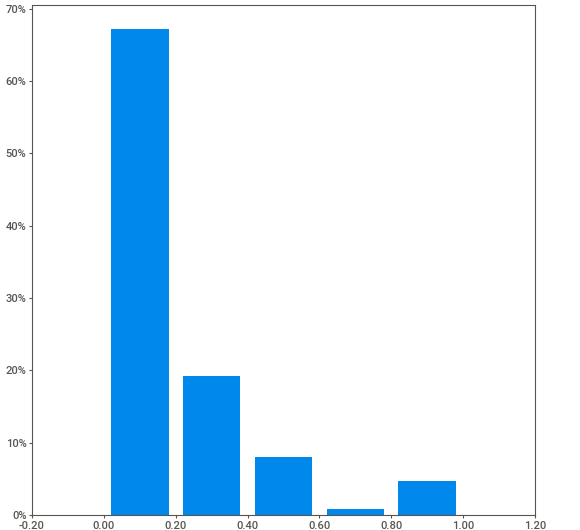
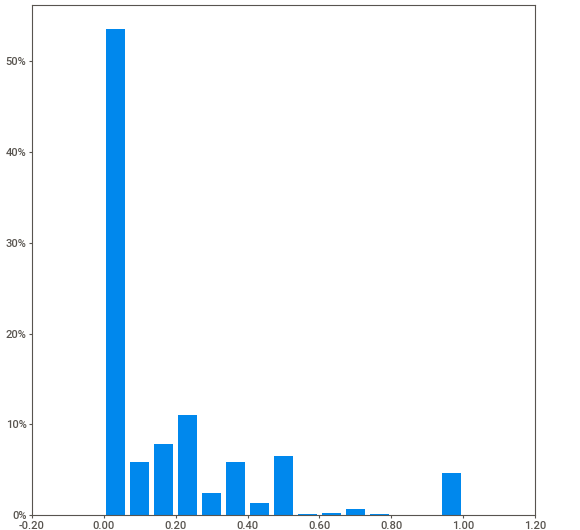
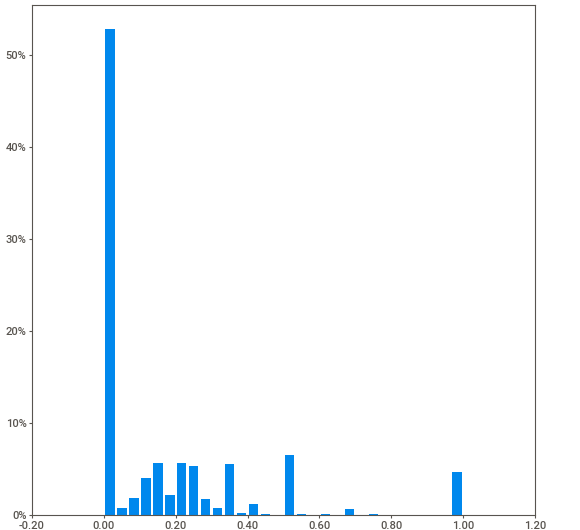
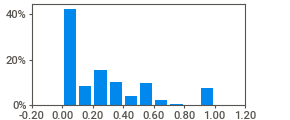
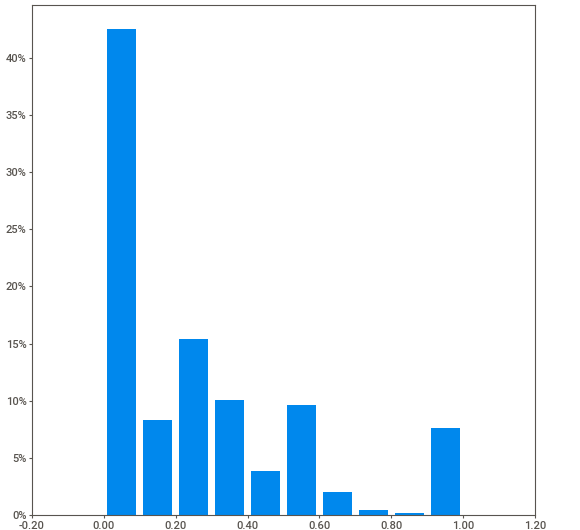
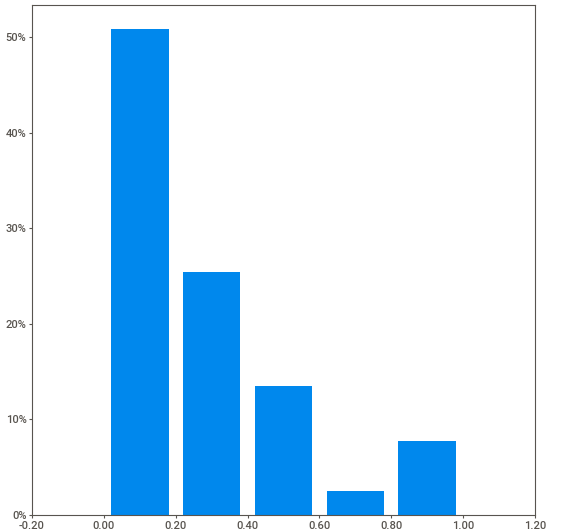
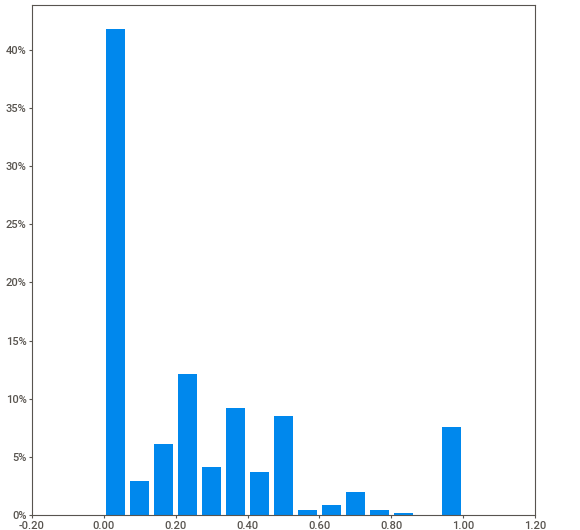
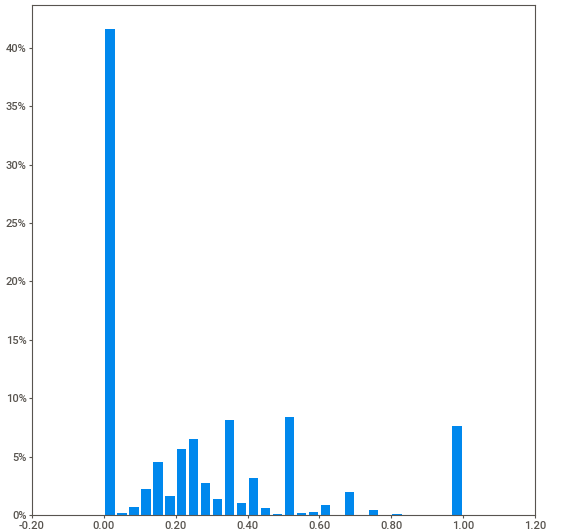
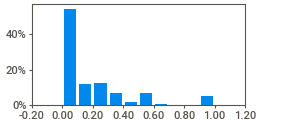
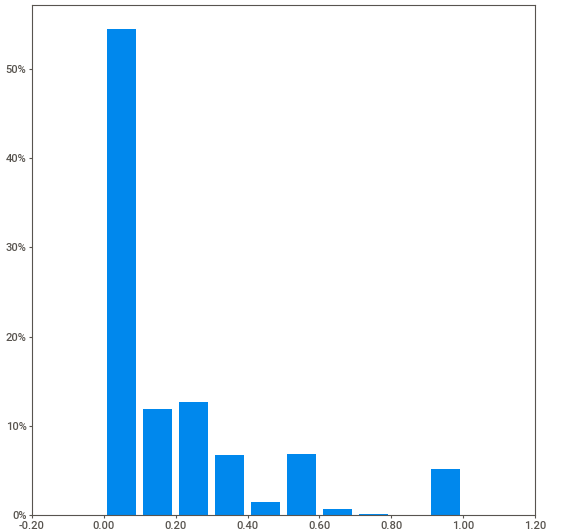
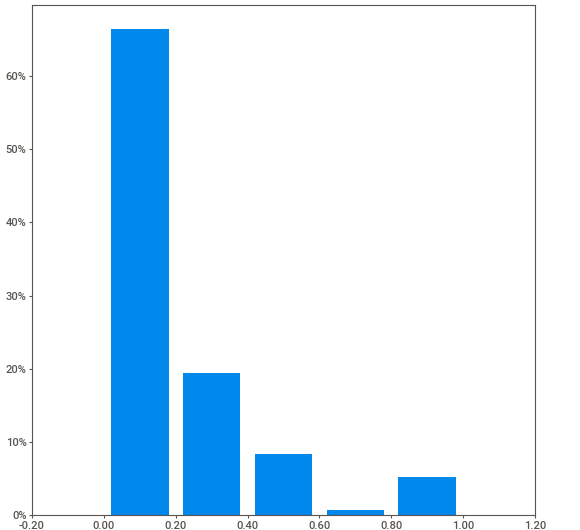
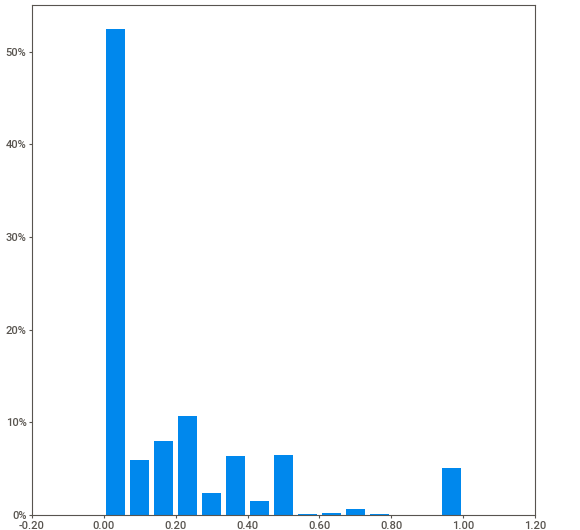
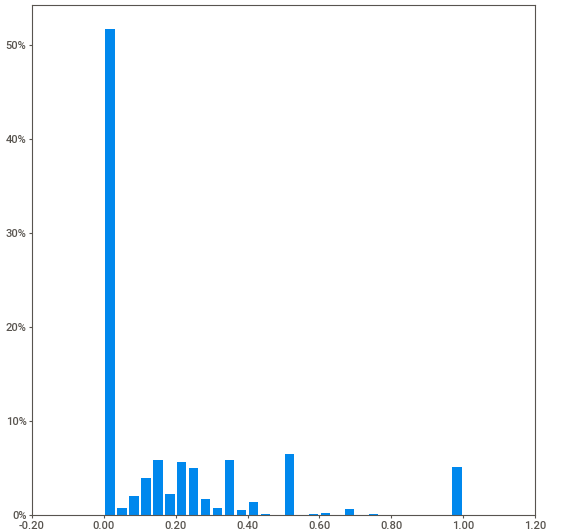
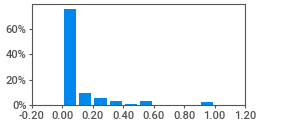
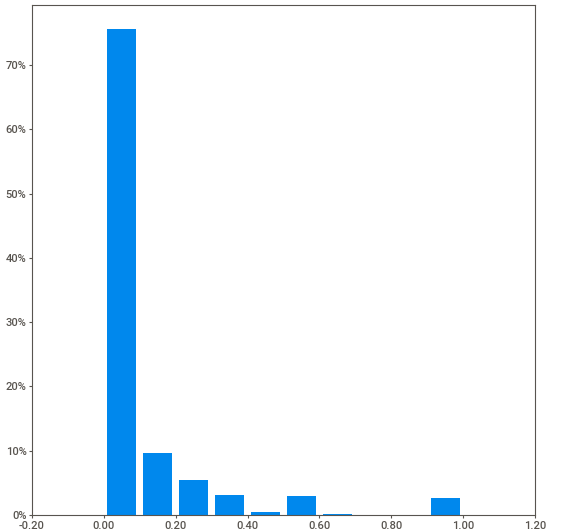
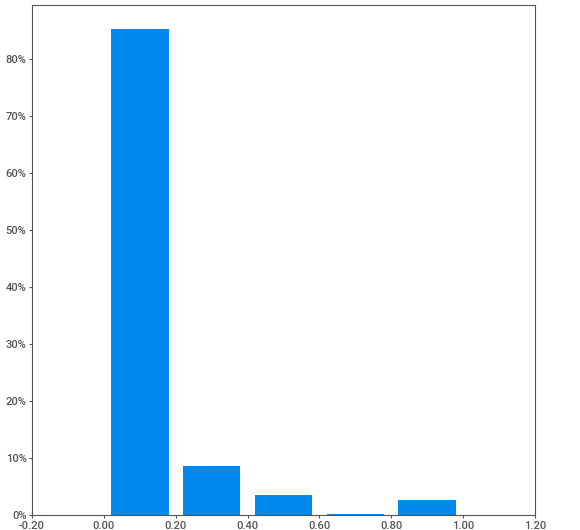
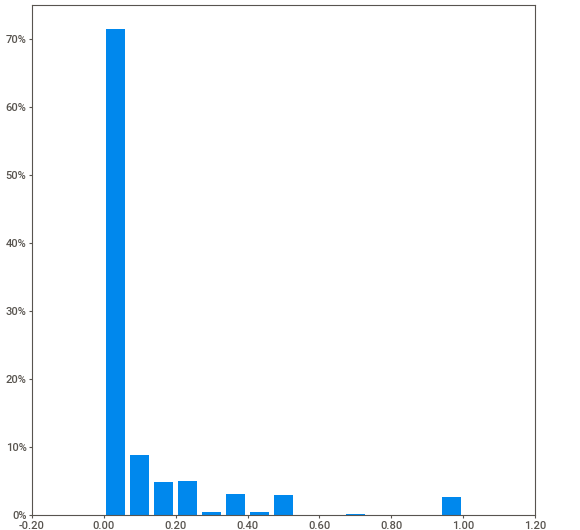
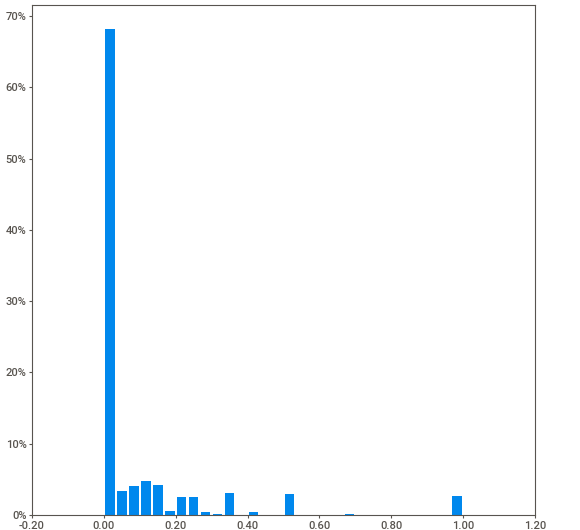
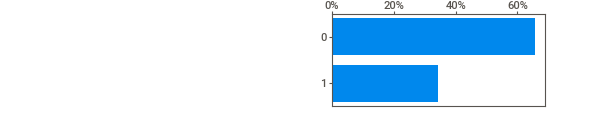
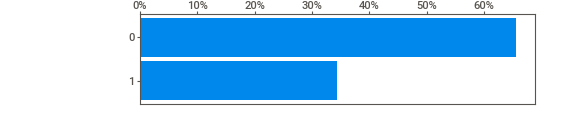
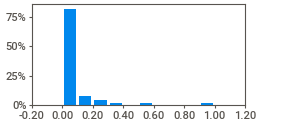
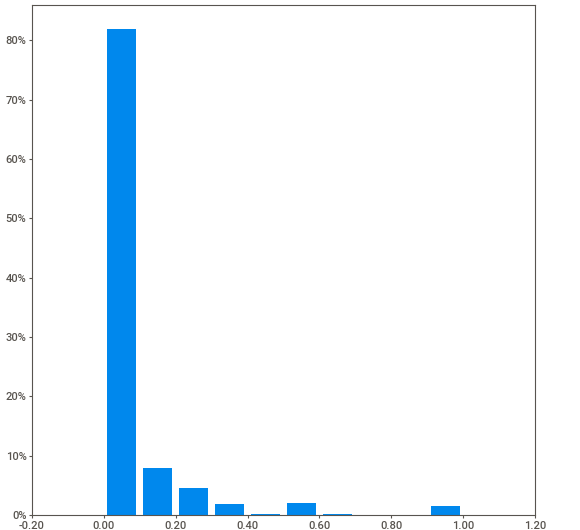
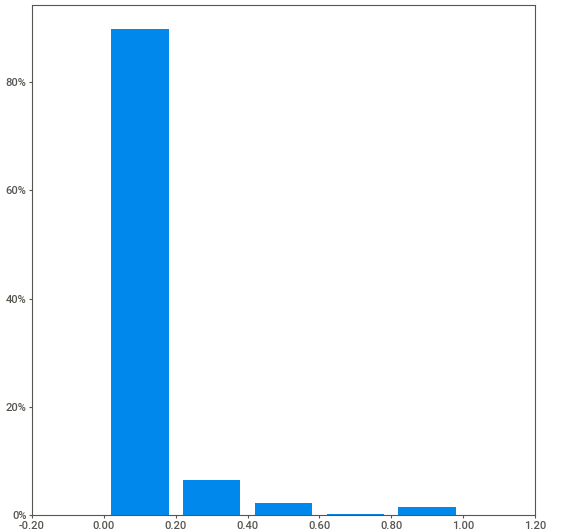
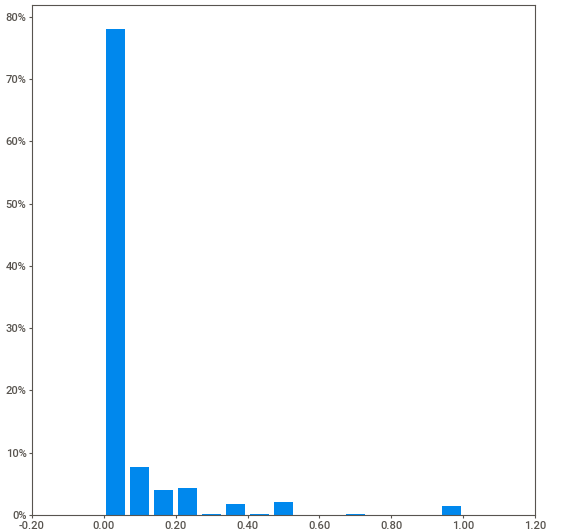
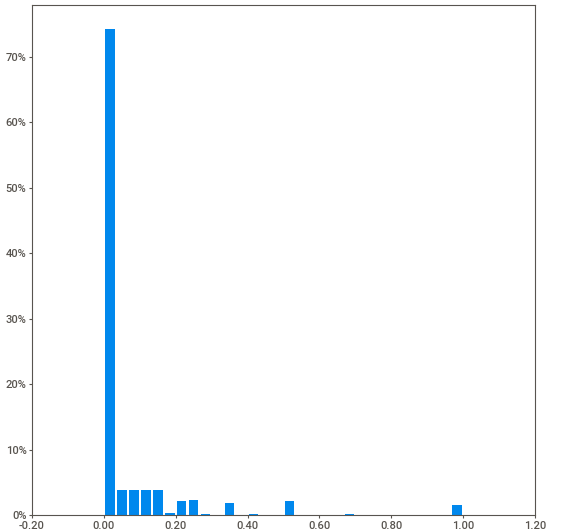
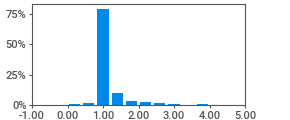
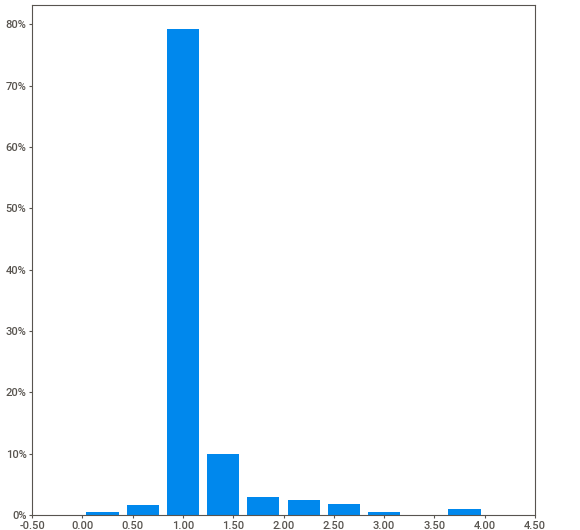
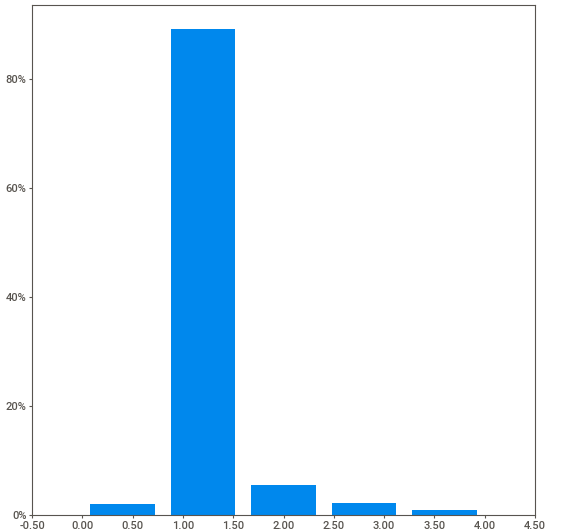
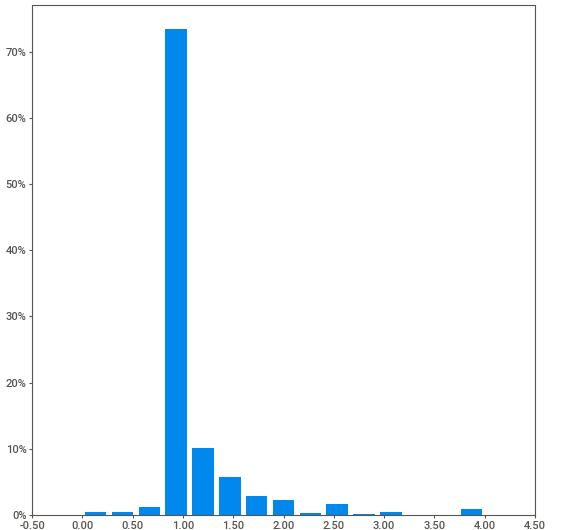
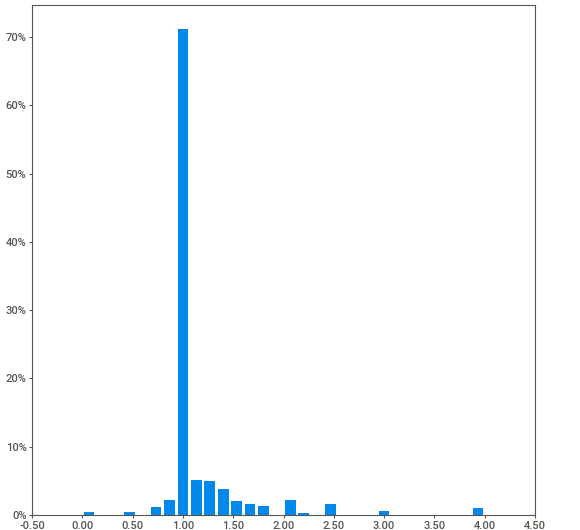
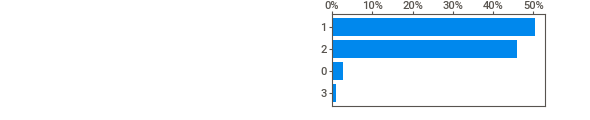
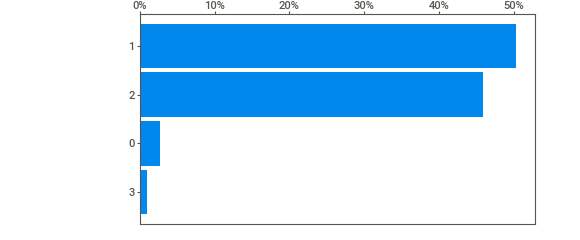
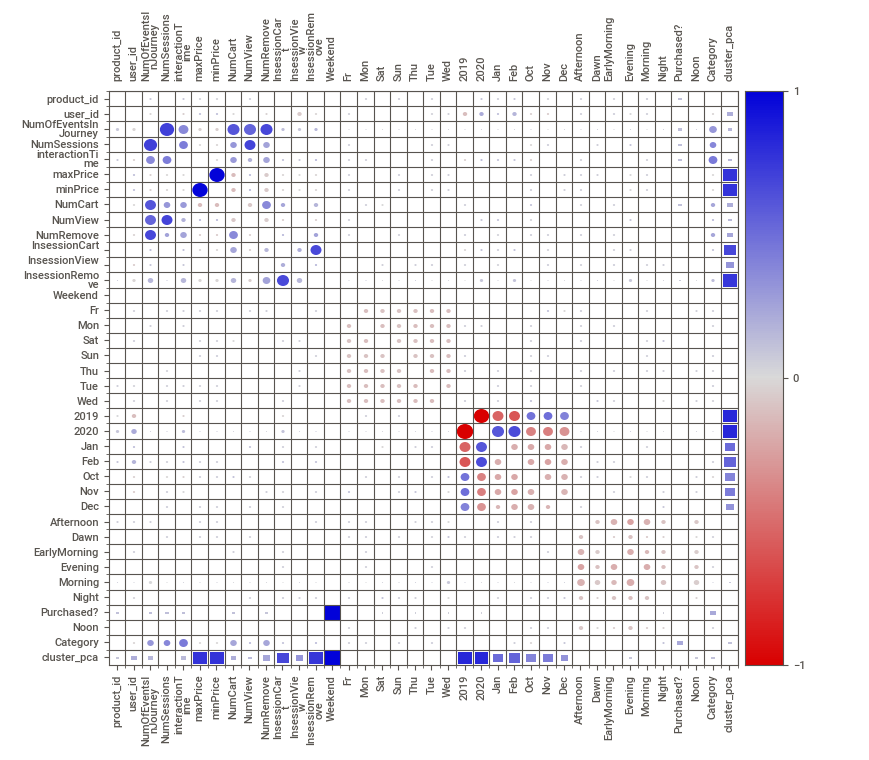
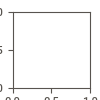

In [40]:
import sweetviz as sv

orig_data_report = sv.analyze(past)
orig_data_report.show_notebook()

In [54]:
past.groupby('cluster_pca')['InsessionRemove'].describe()

count        mean         std  min         25%         50%  \
cluster_pca                                                                
0             137.0    2.316579    6.093286  0.0    0.000000    0.400000   
1            2518.0   17.641907   39.654006  0.0    0.666667    6.454545   
2            2295.0   16.296975   31.970967  0.0    0.666667    6.000000   
3              50.0  727.147000  537.500027  0.0  357.958333  647.500000   

                     75%     max  
cluster_pca                       
0               2.181818    55.0  
1              18.549419   531.0  
2              17.535714   395.0  
3            1021.875000  2068.0

In [50]:
past.groupby('cluster_pca').InsessionCart.describe()

count        mean         std   min     25%         50%  \
cluster_pca                                                             
0             137.0    3.050175    5.248988   0.0    0.00    1.000000   
1            2518.0   18.466729   32.481287   0.0    3.00    9.577381   
2            2295.0   19.081604   33.977388   0.0    2.75    9.161616   
3              50.0  486.830000  424.868657  71.0  195.75  376.333333   

                    75%          max  
cluster_pca                           
0              3.500000    35.000000  
1             21.000000   432.666667  
2             21.666667   463.500000  
3            576.500000  1927.000000

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

**YOUR ANSWER HERE** assumpitions of K-Means is that the variance of the distribution of features are spherical and that each cluster would generally be similar in size. Finally, the prior probability for all k clusters are the same. Based on this, we can see that k-means may not be the best choice for this. 

In [69]:
# YOUR CODE HERE
from sklearn.cluster import Birch

op = Birch(threshold=.4,n_clusters=4)
op.fit(X_reduced)

Birch(n_clusters=4, threshold=0.4)

In [56]:
past['cluster_db'] = dbscan.labels_

In [62]:
import numpy as np
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [70]:
from sklearn.metrics import silhouette_score
silhouette_score(X_reduced, op.labels_, metric='euclidean')

0.48671770360418004

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [72]:
# YOUR CODE HERE
new = pd.read_csv('../dat/new.csv.gz')

In [73]:
assert new.shape == (30091, 5)

In [74]:
new.head()

product_id   maxPrice   minPrice  Purchased?  Category
0     5866502   7.616667   7.616667           0       1.0
1     5870408   6.270000   6.270000           0       3.0
2     5900580  10.008000  10.008000           0       1.0
3     5918778   5.980000   5.980000           0       2.5
4     5848772  26.830000  26.830000           0       1.0

2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

**YOUR ANSWER HERE** Here we can see that the training set is only 5000 samples, whereas the test set has around 30k samples. Also the features for the traing set is alot more explanatory whereas now we only have the product id , category , and min and max price per product.

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [76]:
# YOUR CODE HERE
np.intersect1d(past.product_id,new.product_id)

array([], dtype=int64)

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [77]:
# YOUR CODE HERE # ~.344
new['Purchased?'].mean()

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [86]:
# YOUR CODE HERE
X_train = past[['maxPrice','minPrice','Category']].values
y_train = past['Purchased?'].values

X_test = new[['maxPrice','minPrice','Category']].values
y_test = new['Purchased?'].values

In [87]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [93]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [94]:
# YOUR CODE HERE
X = np.concatenate((X_train,X_test),axis=0)

In [95]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [97]:
# YOUR CODE HERE
new['dummy_labels'] = -1 
dummy_labels = new['dummy_labels']

y = np.concatenate((y_train,dummy_labels))

In [98]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [100]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading

ls = LabelSpreading(alpha=.01,kernel='knn')
ls.fit(X,y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [101]:
semi_sup_preds = ls.transduction_[5000:] # YOUR CODE HERE

In [102]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [103]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.81      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.82      0.78      0.79     30091
weighted avg       0.82      0.82      0.82     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



*YOUR ANSWER HERE*


with semi-supervised learning algorithm, we can see that we perform a lot better on the recall of our purchases by 14 percent! we can also see that our recall was slightly lower for the negative class , but overall the macro recall has gone up by 6 percent, which aligns with our goal of maximizing our recall metric.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)